In [63]:
#Расшифровка переменных - https://www.hse.ru/data/2024/09/19/1110539417/%D0%91%D0%94_2023_hh_codebook.pdf https://www.hse.ru/data/2024/09/29/1416934448/R29_hh_codebook_09.24.pdf
from typing import Optional


# data = pd.read_csv('Working_file_v13_1.csv')
# oil = data[['YID_H', 'status', 'site', 'FAMILYN', 'month', 'y_nfm', 'ye1_38b', 'ye1_38c', 'total_expend', 'hhtype']]

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from statsmodels.iolib.summary2 import summary_col

In [65]:
data_m = pd.read_csv('merged.csv')

Шоки

In [66]:
#data_m.ye1_38c_per_person = data_m.ye1_38c_per_person * 4

In [67]:
data_m.head(
)

,ye1_38b,ye1_38c,total_expend,status,hhtype,y_nfm,total_food,percentile,price_per_liter,total_expend_per_person,total_food_per_person,ye1_38c_per_person
0,1.160,452.3573,31943.421875,3.0,глава Женщина пенс возраста,1.0,9099.440430,52,389.963190,31943.421875,9099.440430,452.357300
1,1.031,365.8707,25445.679688,3.0,глава Женщина пенс возраста,1.0,6879.679688,41,354.869738,25445.679688,6879.679688,365.870700
2,1.000,334.2900,10472.860352,3.0,глава Женщина пенс возраста,1.0,3852.860107,8,334.290000,10472.860352,3852.860107,334.290000
3,1.167,469.8428,56543.460938,3.0,глава Мужчина трудоспос возраста,4.0,26568.109375,79,402.607369,14135.865234,6642.027344,117.460700
4,1.001,408.3949,53498.511719,3.0,глава Мужчина трудоспос возраста,3.0,20237.902344,77,407.986913,17832.837240,6745.967448,136.131633


In [68]:
price_shocks = [0.5, 1.0, 2.0]

for shock in price_shocks:
    shock_column = f'oil_expend_shock_{int(shock*100)}%'
    data_m[shock_column] = data_m['ye1_38c_per_person']* (1 + shock)
    after_shock = f'total_expend_{int(shock*100)}%_shock'
    data_m[after_shock] = data_m['total_expend_per_person'] - data_m['ye1_38c_per_person'] + data_m[shock_column]

In [69]:
data_m.head(2)

,ye1_38b,ye1_38c,total_expend,status,hhtype,y_nfm,total_food,percentile,price_per_liter,total_expend_per_person,total_food_per_person,ye1_38c_per_person,oil_expend_shock_50%,total_expend_50%_shock,oil_expend_shock_100%,total_expend_100%_shock,oil_expend_shock_200%,total_expend_200%_shock
0,1.160,452.3573,31943.421875,3.0,глава Женщина пенс возраста,1.0,9099.440430,52,389.963190,31943.421875,9099.440430,452.3573,678.53595,32169.600525,904.7146,32395.779175,1357.0719,32848.136475
1,1.031,365.8707,25445.679688,3.0,глава Женщина пенс возраста,1.0,6879.679688,41,354.869738,25445.679688,6879.679688,365.8707,548.80605,25628.615037,731.7414,25811.550387,1097.6121,26177.421087


## Посчитали начальные среднии и медианы (без шоков)

In [70]:
data_m['decile'] = pd.qcut(data_m['total_expend_per_person'], q=10, labels=False) + 1

In [71]:
data_no_shocks_mean = data_m.groupby("decile")[["total_expend_per_person", "total_food_per_person", "ye1_38c_per_person"]].mean().round(2)
data_no_shocks_mean = data_no_shocks_mean.reset_index().rename(columns = {"total_expend_per_person":"Расходы", "total_food_per_person": "Расходы на питание", "ye1_38c_per_person": "Расходы на растительное масло", "decile" : "Дециль"})

In [72]:
total_expend_mean = data_m['total_expend_per_person'].mean()
total_food_mean = data_m['total_food_per_person'].mean()
ye1_38c_mean = data_m['ye1_38c_per_person'].mean()

# Добавляем новую строку в DataFrame
data_no_shocks_mean.loc[len(data_no_shocks_mean)] = ['Всего', total_expend_mean, total_food_mean, ye1_38c_mean]
data_no_shocks_mean["% общих расходов"] = ((data_no_shocks_mean["Расходы на растительное масло"]/data_no_shocks_mean["Расходы"]) * 100).round(2)

In [73]:
print(data_no_shocks_mean.to_markdown(index=False))

| Дециль   |   Расходы |   Расходы на питание |   Расходы на растительное масло |   % общих расходов |
|:---------|----------:|---------------------:|--------------------------------:|-------------------:|
| 1        |   5122.29 |              2584.57 |                         185.72  |               3.63 |
| 2        |   7802.98 |              3750.69 |                         215.93  |               2.77 |
| 3        |   9670.96 |              4506.7  |                         225.45  |               2.33 |
| 4        |  11377.5  |              5056.72 |                         246.09  |               2.16 |
| 5        |  13161.2  |              5650.27 |                         268.21  |               2.04 |
| 6        |  15292.5  |              6529.09 |                         265.67  |               1.74 |
| 7        |  17811.3  |              7237.64 |                         274.85  |               1.54 |
| 8        |  21049.3  |              8352.34 |                         3

In [74]:
data_m.total_expend_per_person.mean()
data_m.total_food_per_person.mean()

data_m.ye1_38c_per_person.mean()

np.float64(263.15655411493526)

In [75]:
data_no_shocks_median = data_m.groupby("decile")[["total_expend_per_person", "total_food_per_person", "ye1_38c_per_person"]].median().round(2)
data_no_shocks_median = data_no_shocks_median.reset_index().rename(columns = {"total_expend_per_person":"Расходы", "total_food_per_person": "Расходы на питание", "ye1_38c_per_person": "Расходы на растительное масло", "decile" : "Дециль"})

In [76]:
total_expend_median = data_m['total_expend_per_person'].median()
total_food_median = data_m['total_food_per_person'].median()
ye1_38c_median = data_m['ye1_38c_per_person'].median()

# Добавляем новую строку в DataFrame
data_no_shocks_median.loc[len(data_no_shocks_median)] = ['Всего', total_expend_median, total_food_median, ye1_38c_median]
data_no_shocks_median["% общих расходов"] = ((data_no_shocks_median["Расходы на растительное масло"]/data_no_shocks_median["Расходы"]) * 100).round(2)

In [77]:
print(data_no_shocks_median.to_markdown(index=False))

| Дециль   |   Расходы |   Расходы на питание |   Расходы на растительное масло |   % общих расходов |
|:---------|----------:|---------------------:|--------------------------------:|-------------------:|
| 1        |   5435.71 |              2494.52 |                         169.28  |               3.11 |
| 2        |   7783.82 |              3702.78 |                         185.33  |               2.38 |
| 3        |   9698.97 |              4496.54 |                         193.03  |               1.99 |
| 4        |  11367.1  |              4929.29 |                         203.46  |               1.79 |
| 5        |  13168.2  |              5593.4  |                         200.73  |               1.52 |
| 6        |  15268    |              6452.73 |                         207.63  |               1.36 |
| 7        |  17764.4  |              7136.82 |                         221.98  |               1.25 |
| 8        |  20962    |              8111.06 |                         2

## Таблицы с эффектами от шоков

In [78]:
def shock_mean(percentage, operation):
    if operation == "mean":
        df_result = data_m.groupby("decile")[[f"total_expend_per_person", f"total_expend_{percentage}%_shock"]].mean().astype(int)

    elif operation == "median":
        df_result = data_m.groupby("decile")[[f"total_expend_per_person", f"total_expend_{percentage}%_shock"]].median().astype(int)

    df_result["change_in_welfare"] = df_result[f"total_expend_{percentage}%_shock"] - df_result["total_expend_per_person"]
    df_result["change_in_welfare_percent"] = (
        (df_result[f"total_expend_{percentage}%_shock"] - df_result["total_expend_per_person"]) / df_result["total_expend_per_person"] * 100
    ).round(2)
    df = df_result.reset_index().rename(columns = {"decile": "Дециль", "total_expend_per_person" : "Расходы", f"total_expend_{percentage}%_shock" : f"Расходы после {percentage}% шока", "change_in_welfare" : f"Изменение благосоcтояния ({percentage}%)", "change_in_welfare_percent": f"Изменение благосостояния в процентах ({percentage}%)"})

    return df 



# Инициализация DataFrame
data_50pc_shock_mean = shock_mean(50, "mean")
data_100pc_shock_mean = shock_mean(100, "mean")
data_200pc_shock_mean = shock_mean(200, "mean")

data_50pc_shock_median = shock_mean(50, "median")
data_100pc_shock_median = shock_mean(100, "median")
data_200pc_shock_median = shock_mean(200, "median")

In [79]:
data_100pc_shock_median

,Дециль,Расходы,Расходы после 100% шока,Изменение благосоcтояния (100%),Изменение благосостояния в процентах (100%)
0,1,5435,5561,126,2.32
1,2,7783,8005,222,2.85
2,3,9698,9895,197,2.03
3,4,11367,11635,268,2.36
4,5,13168,13398,230,1.75
5,6,15267,15511,244,1.60
6,7,17764,18065,301,1.69
7,8,20962,21241,279,1.33
8,9,26560,26860,300,1.13
9,10,43113,43514,401,0.93


In [80]:
def saving(data_mean, data_median, shock):
    # Добавляем столбцы "Показатель" и "Дециль"
    data_mean['Показатель'] = 'Среднее'
    data_median['Показатель'] = 'Медиана'

    data_mean['Дециль'] = range(1, 11)
    data_median['Дециль'] = range(1, 11)

    # Переносим 'Медиана' на второй столбец и объединяем таблицы
    combined = pd.concat([data_mean, data_median]).sort_values(by='Дециль').reset_index(drop=True)

    # Перемещение столбцов в нужном порядке
    combined = combined[['Дециль', 'Показатель', 'Расходы', 
                        f'Расходы после {shock}% шока', f'Изменение благосоcтояния ({shock}%)', f'Изменение благосостояния в процентах ({shock}%)']]
    
    return combined

    # Сохранение в Excel
   # combined.to_excel(f'combined_table_final_{shock}.xlsx', index=False)


combined50 = saving(data_50pc_shock_mean, data_50pc_shock_median, 50)
combined100 =  saving(data_100pc_shock_mean, data_100pc_shock_median, 100)
combined200 =  saving(data_200pc_shock_mean, data_200pc_shock_median, 200)

combined50["Расходы после 100% шока"] = combined100["Расходы после 100% шока"]
combined50["Изменение благосоcтояния (100%)"] = combined100["Изменение благосоcтояния (100%)"]
combined50["Изменение благосостояния в процентах (100%)"] = combined100["Изменение благосостояния в процентах (100%)"]
# combined50["Расходы после 200% шока"] = combined200["Расходы после 200% шока"]
# combined50["Изменение благосоcтояния (200%)"] = combined200["Изменение благосоcтояния (200%)"]
# combined50["Изменение благосостояния в процентах (200%)"] = combined200["Изменение благосостояния в процентах (200%)"]

#combined50["Дециль"] = combined50["Дециль"].where(combined50["Дециль"].duplicated() == False, "")

In [81]:
data_m.columns

Index(['ye1_38b', 'ye1_38c', 'total_expend', 'status', 'hhtype', 'y_nfm',
       'total_food', 'percentile', 'price_per_liter',
       'total_expend_per_person', 'total_food_per_person',
       'ye1_38c_per_person', 'oil_expend_shock_50%', 'total_expend_50%_shock',
       'oil_expend_shock_100%', 'total_expend_100%_shock',
       'oil_expend_shock_200%', 'total_expend_200%_shock', 'decile'],
      dtype='object')

In [82]:
data_m["wealfare_change_absolute_50"] = data_m["total_expend_50%_shock"] - data_m["total_expend_per_person"]
data_m["wealfare_change_absolute_100"] = data_m["total_expend_100%_shock"] - data_m["total_expend_per_person"]
data_m["wealfare_change_absolute_200"] = data_m["total_expend_200%_shock"] - data_m["total_expend_per_person"]
data_m["wealfare_change_perc_50"] = (data_m["total_expend_50%_shock"] / data_m["total_expend_per_person"] - 1) * 100
data_m["wealfare_change_perc_100"] = (data_m["total_expend_100%_shock"] / data_m["total_expend_per_person"] - 1) * 100
data_m["wealfare_change_perc_200"] = (data_m["total_expend_200%_shock"] / data_m["total_expend_per_person"] - 1) * 100

In [83]:
expend_mean = data_m['total_expend_per_person'].mean().astype(int)
expend_median = data_m['total_expend_per_person'].median().astype(int)
total_expend_50_shock_mean = data_m['total_expend_50%_shock'].mean().astype(int)
total_expend_50_shock_median = data_m['total_expend_50%_shock'].median().astype(int)

total_expend_100_shock_mean = data_m['total_expend_100%_shock'].mean().astype(int)
total_expend_100_shock_median = data_m['total_expend_100%_shock'].median().astype(int)

total_expend_200_shock_mean = data_m['total_expend_200%_shock'].mean().astype(int)
total_expend_200_shock_median = data_m['total_expend_200%_shock'].median().astype(int)


wealfare_change_absolute_50_mean = data_m["wealfare_change_absolute_50"].mean().astype(int)
wealfare_change_absolute_50_median = data_m["wealfare_change_absolute_50"].median().astype(int)

wealfare_change_absolute_100_mean = data_m["wealfare_change_absolute_100"].mean().astype(int)
wealfare_change_absolute_100_median = data_m["wealfare_change_absolute_100"].median().astype(int)


wealfare_change_absolute_200_mean = data_m["wealfare_change_absolute_200"].mean().astype(int)
wealfare_change_absolute_200_median = data_m["wealfare_change_absolute_200"].median().astype(int)

wealfare_change_perc_50_mean = data_m["wealfare_change_perc_50"].mean().round(2)
wealfare_change_perc_50_median = data_m["wealfare_change_perc_50"].median().round(2)

wealfare_change_perc_100_mean = data_m["wealfare_change_perc_100"].mean().round(2)
wealfare_change_perc_100_median = data_m["wealfare_change_perc_100"].median().round(2)

wealfare_change_perc_200_mean = data_m["wealfare_change_perc_200"].mean().round(2)
wealfare_change_perc_200_median = data_m["wealfare_change_perc_200"].median().round(2)


# Добавляем новую строку в DataFrame
combined50.loc[len(combined50)] = ['Всего', "Среднее", expend_mean, total_expend_50_shock_mean, wealfare_change_absolute_50_mean, wealfare_change_perc_50_mean, total_expend_100_shock_mean, wealfare_change_absolute_100_mean, wealfare_change_perc_100_mean]
combined50.loc[len(combined50)] = ['Всего', "Медиана", expend_median, total_expend_50_shock_median, wealfare_change_absolute_50_median, wealfare_change_perc_50_median, total_expend_100_shock_median, wealfare_change_absolute_100_median, wealfare_change_perc_100_median]

#combined50["Дециль"] = combined50["Дециль"].where(combined50["Дециль"].duplicated() == False, "")

In [84]:
combined50['Показатель'] = pd.Categorical(combined50['Показатель'], categories=['Среднее', 'Медиана'], ordered=True)
combined50 = combined50.sort_values(by=['Дециль', 'Показатель'], ascending=[True, True])

In [85]:
combined50["Дециль"] = combined50["Дециль"].where(combined50["Дециль"].duplicated() == False, "")

print(combined50.to_markdown(index=False))

| Дециль   | Показатель   |   Расходы |   Расходы после 50% шока |   Изменение благосоcтояния (50%) |   Изменение благосостояния в процентах (50%) |   Расходы после 100% шока |   Изменение благосоcтояния (100%) |   Изменение благосостояния в процентах (100%) |
|:---------|:-------------|----------:|-------------------------:|---------------------------------:|---------------------------------------------:|--------------------------:|----------------------------------:|----------------------------------------------:|
| 1        | Среднее      |      5122 |                     5215 |                               93 |                                         1.82 |                      5308 |                               186 |                                          3.63 |
|          | Медиана      |      5435 |                     5498 |                               63 |                                         1.16 |                      5561 |                               126 |     

In [86]:
combined200.loc[len(combined200)] = ['Всего', "Среднее", expend_mean, total_expend_200_shock_mean, wealfare_change_absolute_200_mean, wealfare_change_perc_200_mean]
combined200.loc[len(combined200)] = ['Всего', "Медиана", expend_median, total_expend_200_shock_median, wealfare_change_absolute_200_median, wealfare_change_perc_200_median]

In [87]:
combined200["Дециль"] = combined200["Дециль"].where(combined200["Дециль"].duplicated() == False, "")
print(combined200.to_markdown(index=False))

| Дециль   | Показатель   |   Расходы |   Расходы после 200% шока |   Изменение благосоcтояния (200%) |   Изменение благосостояния в процентах (200%) |
|:---------|:-------------|----------:|--------------------------:|----------------------------------:|----------------------------------------------:|
| 1        | Среднее      |      5122 |                      5493 |                               371 |                                          7.24 |
|          | Медиана      |      5435 |                      5719 |                               284 |                                          5.23 |
| 2        | Медиана      |      7783 |                      8192 |                               409 |                                          5.26 |
|          | Среднее      |      7802 |                      8234 |                               432 |                                          5.54 |
| 3        | Среднее      |      9670 |                     10121 |                     

## Графики с эффектами от шоков

In [88]:
import matplotlib.pyplot as plt

def plotting(df, percentage):
    # Построение графиков с общими осями X и Y, но разными заголовками
    fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(12, 5))

    # Создаём значения для X: от 1 до количества децилей
    x_values = range(1, len(df[0].index) + 1)

    # Первый график: Среднее изменение благосостояния
    axes[0].bar(x_values, df[0][f"Изменение благосостояния в процентах ({percentage}%)"],
                color="skyblue", edgecolor="black", align="center")
    axes[0].set_title(f"Шоки - {percentage}% (среднее)", fontsize=18)

    # Второй график: Медиана изменения благосостояния
    axes[1].bar(x_values, df[1][f"Изменение благосостояния в процентах ({percentage}%)"],
                color="orange", edgecolor="black", align="center")
    axes[1].set_title(f"Шоки - {percentage}% (медиана)", fontsize=18)

    # Установка тиков и меток оси X
    axes[0].set_xticks(x_values)
    axes[0].set_xticklabels(x_values, fontsize=12)

    axes[1].set_xticks(x_values)
    axes[1].set_xticklabels(x_values, fontsize=12)

    # Добавляем подписи
    fig.text(0.5, 0.01, "Дециль", ha="center", fontsize=16)
    fig.text(0.02, 0.5, "Потери благосостояния %", va="center", rotation="vertical", fontsize=16)


    axes[1].tick_params(axis="y", labelright=True)  # Включаем Y справа
    axes[1].yaxis.tick_right()

    # Сохранение
    #plt.tight_layout()
    plt.savefig(f"{percentage}_new.png", dpi=400)
    plt.show()


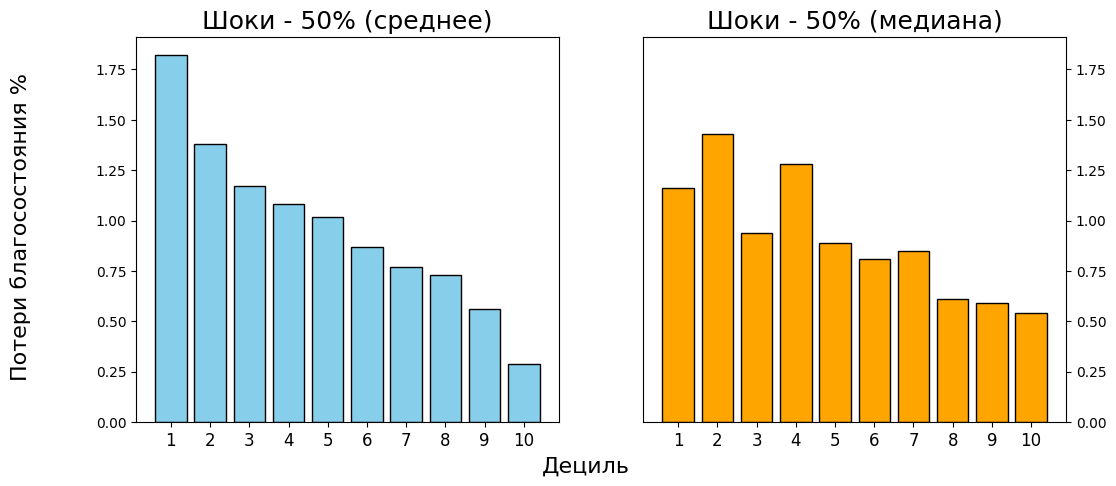

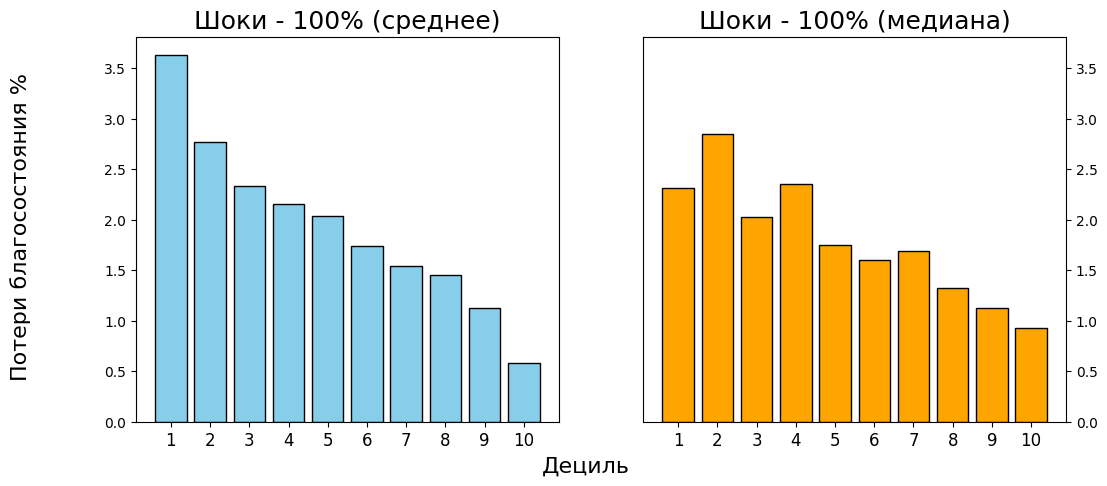

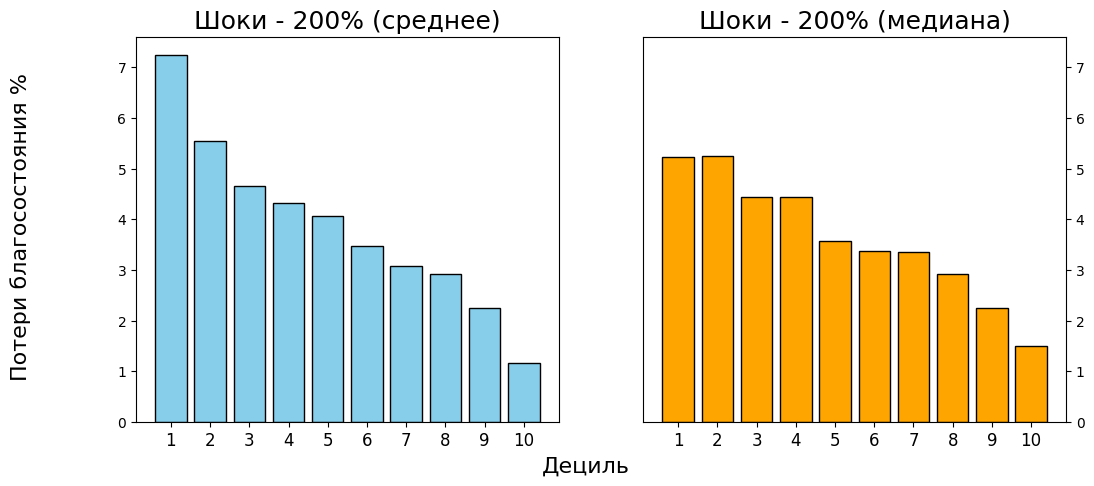

In [89]:
dfs = [[data_50pc_shock_mean, data_50pc_shock_median], [data_100pc_shock_mean, data_100pc_shock_median], [data_200pc_shock_mean, data_200pc_shock_median]]
shocks = [50, 100, 200]

for i in range(3):
    plotting(dfs[i], shocks[i])

## Странное распределение по персентилям

In [90]:
data_m['percentile'] = (data_m['total_expend_per_person'].rank(pct=True) * 100).astype(int)


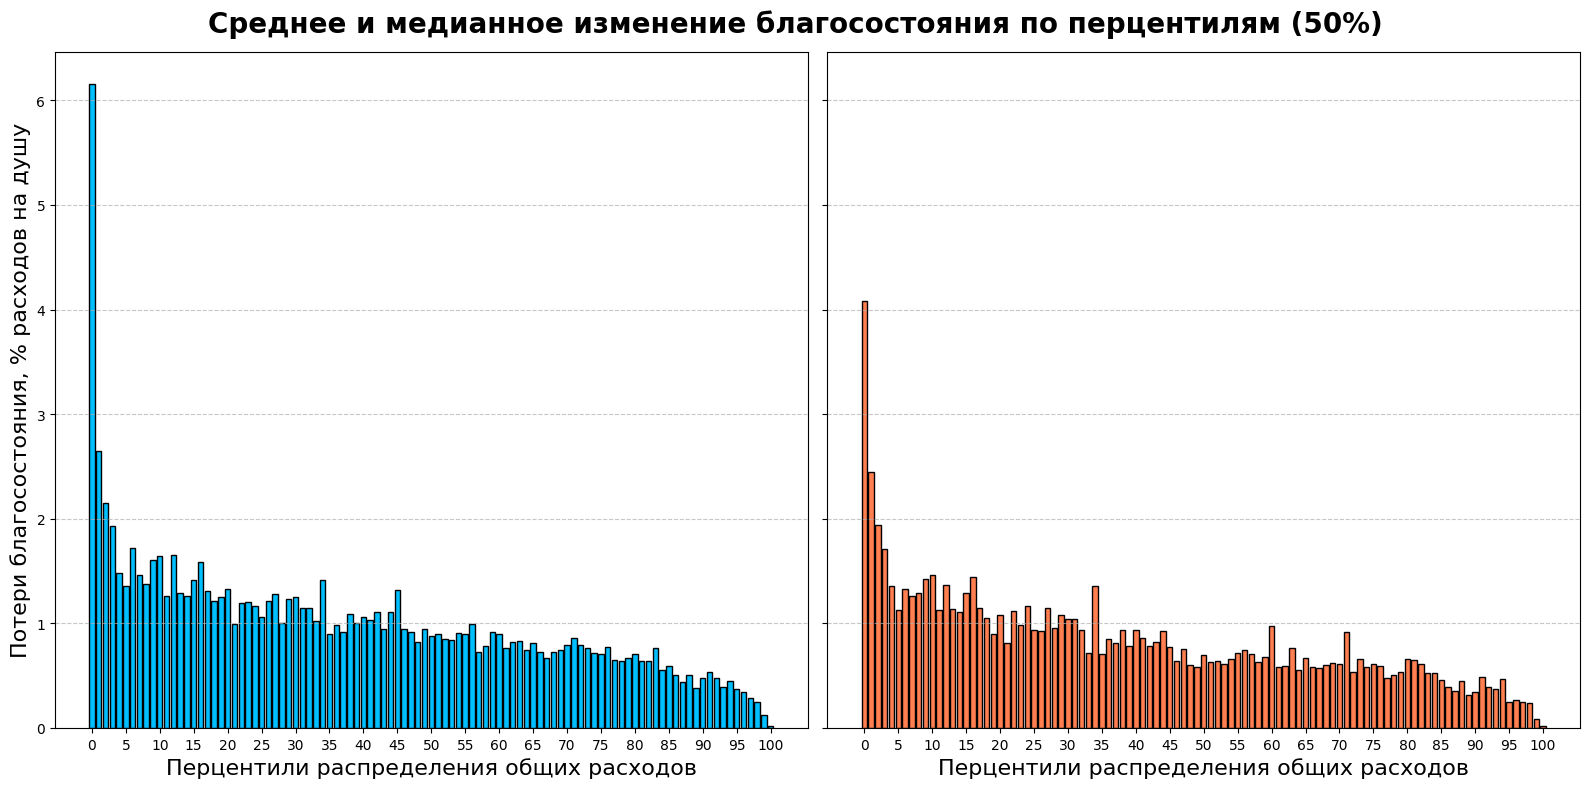

In [91]:
# Группируем данные и вычисляем средние и медианные значения
mean_grouped_data = data_m.groupby("percentile")["wealfare_change_perc_50"].mean()
median_grouped_data = data_m.groupby("percentile")["wealfare_change_perc_50"].median()

# Создаем фигуру и оси для двух графиков
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(16, 8))
fig.suptitle("Среднее и медианное изменение благосостояния по перцентилям (50%)", fontsize=20, fontweight='bold')

# Первый график: средние значения
axes[0].bar(mean_grouped_data.index, mean_grouped_data.values, color="deepskyblue", edgecolor="black")
#axes[0].set_title("Среднее и медианное изменение благосостояния по перцентилям (50%)", fontsize=16, fontweight='bold')
axes[0].set_xlabel("Перцентили распределения общих расходов", fontsize=16)
axes[0].set_ylabel("Потери благосостояния, % расходов на душу", fontsize=16)
axes[0].set_xticks(range(0, 101, 5))
axes[0].grid(axis="y", linestyle="--", alpha=0.7)

# Второй график: медианные значения
axes[1].bar(median_grouped_data.index, median_grouped_data.values, color="coral", edgecolor="black")
#axes[1].set_title("Медианное изменение благосостояния (50%)", fontsize=16, fontweight='bold')
axes[1].set_xlabel("Перцентили распределения общих расходов", fontsize=16)
axes[1].grid(axis="y", linestyle="--", alpha=0.7)

# Настройка общего оформления
fig.tight_layout()
plt.savefig(f"percentile50_comparison.png", dpi=400)
plt.show()


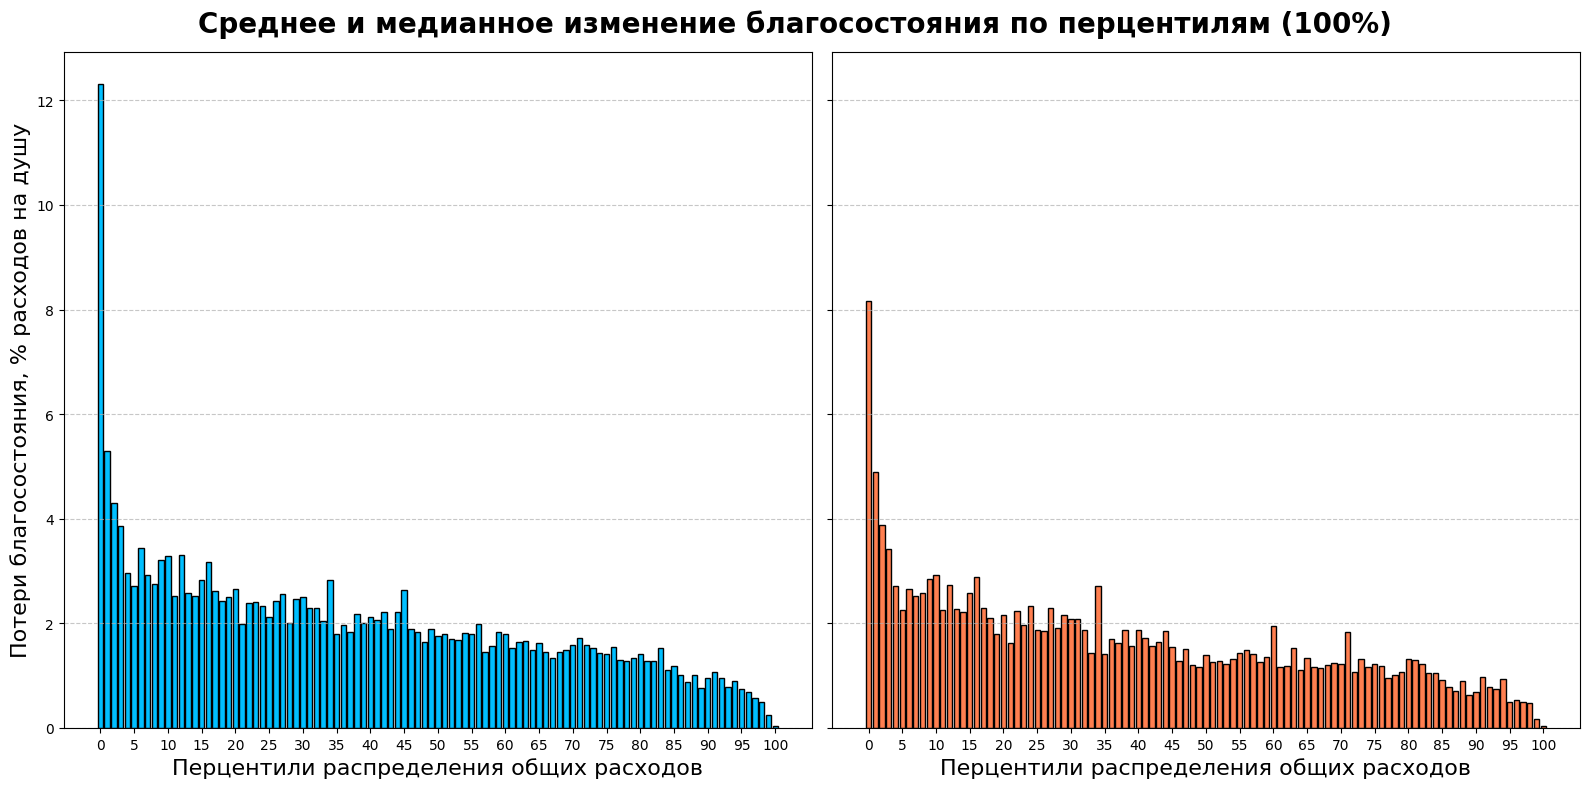

In [92]:
# Группируем данные и вычисляем средние и медианные значения
mean_grouped_data = data_m.groupby("percentile")["wealfare_change_perc_100"].mean()
median_grouped_data = data_m.groupby("percentile")["wealfare_change_perc_100"].median()

# Создаем фигуру и оси для двух графиков
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(16, 8))
fig.suptitle("Среднее и медианное изменение благосостояния по перцентилям (100%)", fontsize=20, fontweight='bold')
# Первый график: средние значения
axes[0].bar(mean_grouped_data.index, mean_grouped_data.values, color="deepskyblue", edgecolor="black")
#axes[0].set_title("Среднее изменение благосостояния по перцентилям (100%)", fontsize=16)
axes[0].set_xlabel("Перцентили распределения общих расходов", fontsize=16)
axes[0].set_ylabel("Потери благосостояния, % расходов на душу", fontsize=16)
axes[0].set_xticks(range(0, 101, 5))
axes[0].grid(axis="y", linestyle="--", alpha=0.7)

# Второй график: медианные значения
axes[1].bar(median_grouped_data.index, median_grouped_data.values, color="coral", edgecolor="black")
#axes[1].set_title("Медианное изменение благосостояния по перцентилям (100%)", fontsize=16)
axes[1].set_xlabel("Перцентили распределения общих расходов", fontsize=16)
axes[1].grid(axis="y", linestyle="--", alpha=0.7)

# Настройка общего оформления
fig.tight_layout()
plt.savefig(f"percentile100_comparison.png", dpi=400)
plt.show()

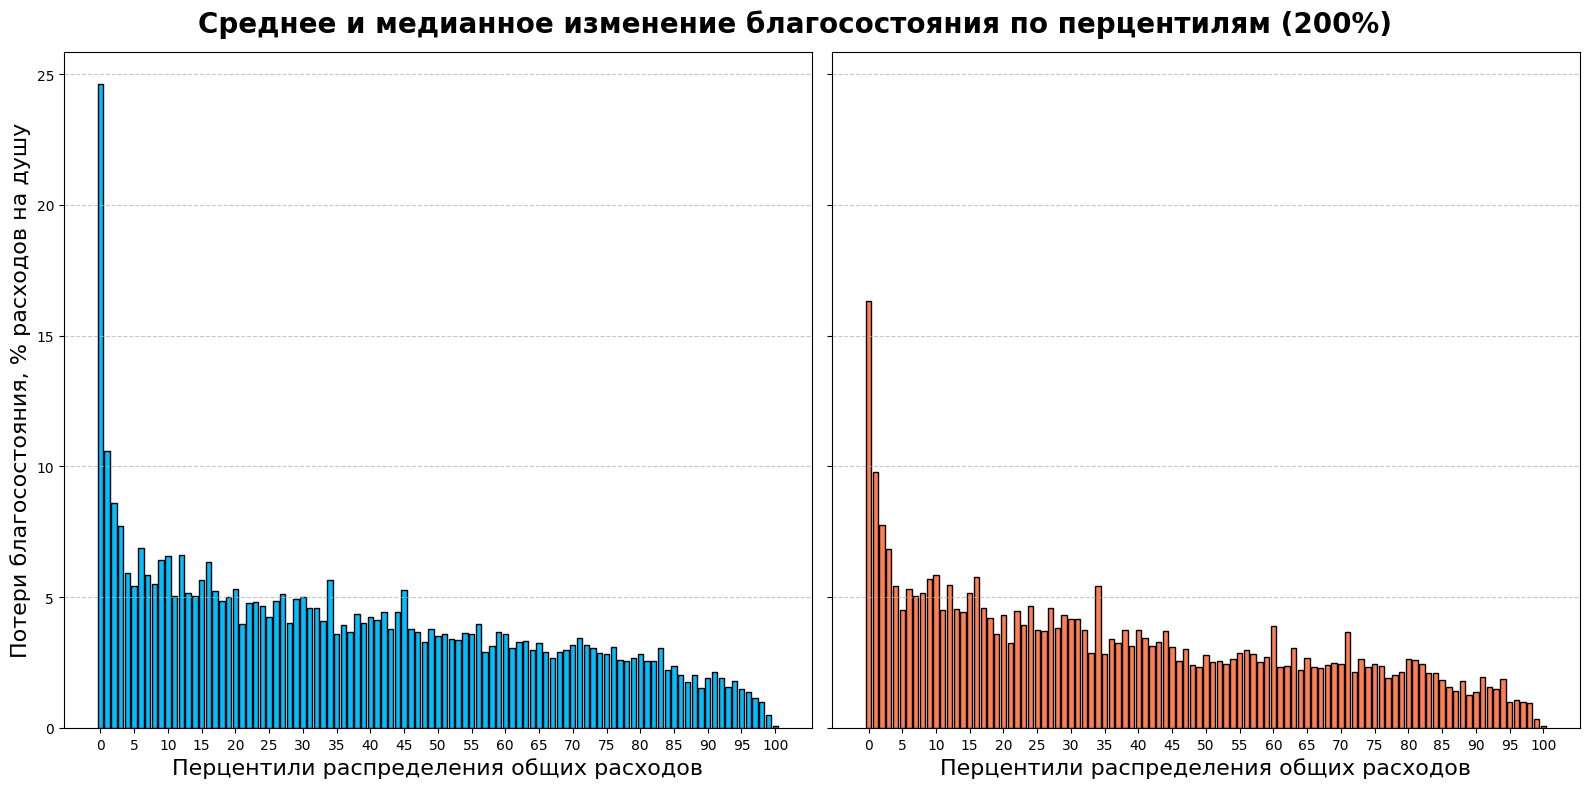

In [93]:
# Группируем данные и вычисляем средние и медианные значения
mean_grouped_data = data_m.groupby("percentile")["wealfare_change_perc_200"].mean()
median_grouped_data = data_m.groupby("percentile")["wealfare_change_perc_200"].median()

# Создаем фигуру и оси для двух графиков
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(16, 8))
fig.suptitle("Среднее и медианное изменение благосостояния по перцентилям (200%)", fontsize=20, fontweight='bold')
# Первый график: средние значения
axes[0].bar(mean_grouped_data.index, mean_grouped_data.values, color="deepskyblue", edgecolor="black")
#axes[0].set_title("Среднее изменение благосостояния по перцентилям (200%)", fontsize=16)
axes[0].set_xlabel("Перцентили распределения общих расходов", fontsize=16)
axes[0].set_ylabel("Потери благосостояния, % расходов на душу", fontsize=16)
axes[0].set_xticks(range(0, 101, 5))
axes[0].grid(axis="y", linestyle="--", alpha=0.7)

# Второй график: медианные значения
axes[1].bar(median_grouped_data.index, median_grouped_data.values, color="coral", edgecolor="black")
#axes[1].set_title("Медианное изменение благосостояния по перцентилям (200%)", fontsize=16)
axes[1].set_xlabel("Перцентили распределения общих расходов", fontsize=16)
axes[1].grid(axis="y", linestyle="--", alpha=0.7)

# Настройка общего оформления
fig.tight_layout()
plt.savefig(f"percentile200_comparison.png", dpi=400)
plt.show()

## Log diff

In [94]:
df_encoded = pd.get_dummies(data_m, columns=['decile'], prefix='decile')
df_encoded[['decile_1','decile_2',
       'decile_3', 'decile_4', 'decile_5', 'decile_6', 'decile_7', 'decile_8',
       'decile_9', 'decile_10']] = df_encoded[['decile_1', 'decile_2',
       'decile_3', 'decile_4', 'decile_5', 'decile_6', 'decile_7', 'decile_8',
       'decile_9', 'decile_10']].astype(int)

In [95]:
import statsmodels.api as sm
df_encoded["change_50%_total"] = (df_encoded["total_expend_50%_shock"] - df_encoded["total_expend_per_person"])
#df_encoded["change_50%_total_percent"] = (df_encoded["total_expend_50%_shock"] - df_encoded["total_expend_per_person"]) /  df_encoded["total_expend_per_person"]

df_encoded["log_change_50%_total"] = np.log(df_encoded["change_50%_total"])

y = df_encoded["log_change_50%_total"]

X = df_encoded[['decile_2',
       'decile_3', 'decile_4', 'decile_5', 'decile_6', 'decile_7', 'decile_8',
       'decile_9', 'decile_10']]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

In [96]:
summary = summary_col([model], stars=True, float_format="%.4f")
print(summary)


               log_change_50%_total
-----------------------------------
const          4.3951***           
               (0.0280)            
decile_2       0.1214***           
               (0.0396)            
decile_3       0.1777***           
               (0.0396)            
decile_4       0.2381***           
               (0.0396)            
decile_5       0.2874***           
               (0.0396)            
decile_6       0.2962***           
               (0.0396)            
decile_7       0.3565***           
               (0.0396)            
decile_8       0.4535***           
               (0.0396)            
decile_9       0.4473***           
               (0.0396)            
decile_10      0.5314***           
               (0.0396)            
R-squared      0.0637              
R-squared Adj. 0.0618              
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [97]:
import statsmodels.api as sm
df_encoded["change_100%_total"] = (df_encoded["total_expend_100%_shock"] - df_encoded["total_expend_per_person"])
#df_encoded["change_50%_total_percent"] = (df_encoded["total_expend_50%_shock"] - df_encoded["total_expend_per_person"]) /  df_encoded["total_expend_per_person"]

df_encoded["log_change_100%_total"] = np.log(df_encoded["change_100%_total"])

y = df_encoded["log_change_100%_total"]

X = df_encoded[['decile_2',
       'decile_3', 'decile_4', 'decile_5', 'decile_6', 'decile_7', 'decile_8',
       'decile_9', 'decile_10']]
X = sm.add_constant(X)

model2 = sm.OLS(y, X).fit()

In [98]:
summary = summary_col([model2], stars=True, float_format="%.4f")
print(summary)


               log_change_100%_total
------------------------------------
const          5.0882***            
               (0.0280)             
decile_2       0.1214***            
               (0.0396)             
decile_3       0.1777***            
               (0.0396)             
decile_4       0.2381***            
               (0.0396)             
decile_5       0.2874***            
               (0.0396)             
decile_6       0.2962***            
               (0.0396)             
decile_7       0.3565***            
               (0.0396)             
decile_8       0.4535***            
               (0.0396)             
decile_9       0.4473***            
               (0.0396)             
decile_10      0.5314***            
               (0.0396)             
R-squared      0.0637               
R-squared Adj. 0.0618               
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [99]:
import statsmodels.api as sm
df_encoded["change_200%_total"] = (df_encoded["total_expend_200%_shock"] - df_encoded["total_expend_per_person"])
#df_encoded["change_50%_total_percent"] = (df_encoded["total_expend_50%_shock"] - df_encoded["total_expend_per_person"]) /  df_encoded["total_expend_per_person"]

df_encoded["log_change_200%_total"] = np.log(df_encoded["change_200%_total"])

y = df_encoded["log_change_200%_total"]

X = df_encoded[['decile_2',
       'decile_3', 'decile_4', 'decile_5', 'decile_6', 'decile_7', 'decile_8',
       'decile_9', 'decile_10']]
X = sm.add_constant(X)

model3 = sm.OLS(y, X).fit()

In [100]:
summary = summary_col([model3], stars=True, float_format="%.4f")
print(summary)


               log_change_200%_total
------------------------------------
const          5.7814***            
               (0.0280)             
decile_2       0.1214***            
               (0.0396)             
decile_3       0.1777***            
               (0.0396)             
decile_4       0.2381***            
               (0.0396)             
decile_5       0.2874***            
               (0.0396)             
decile_6       0.2962***            
               (0.0396)             
decile_7       0.3565***            
               (0.0396)             
decile_8       0.4535***            
               (0.0396)             
decile_9       0.4473***            
               (0.0396)             
decile_10      0.5314***            
               (0.0396)             
R-squared      0.0637               
R-squared Adj. 0.0618               
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


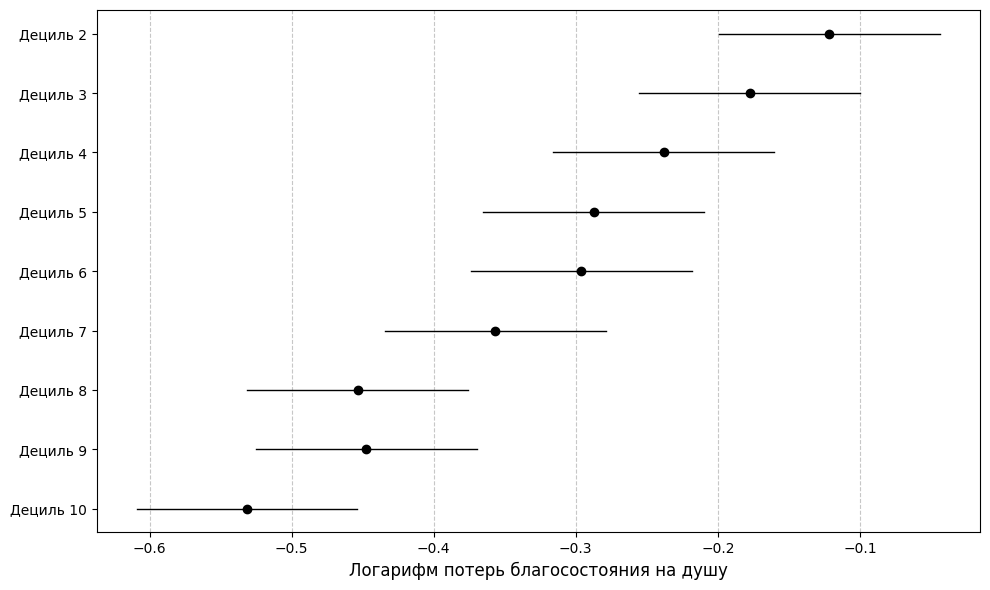

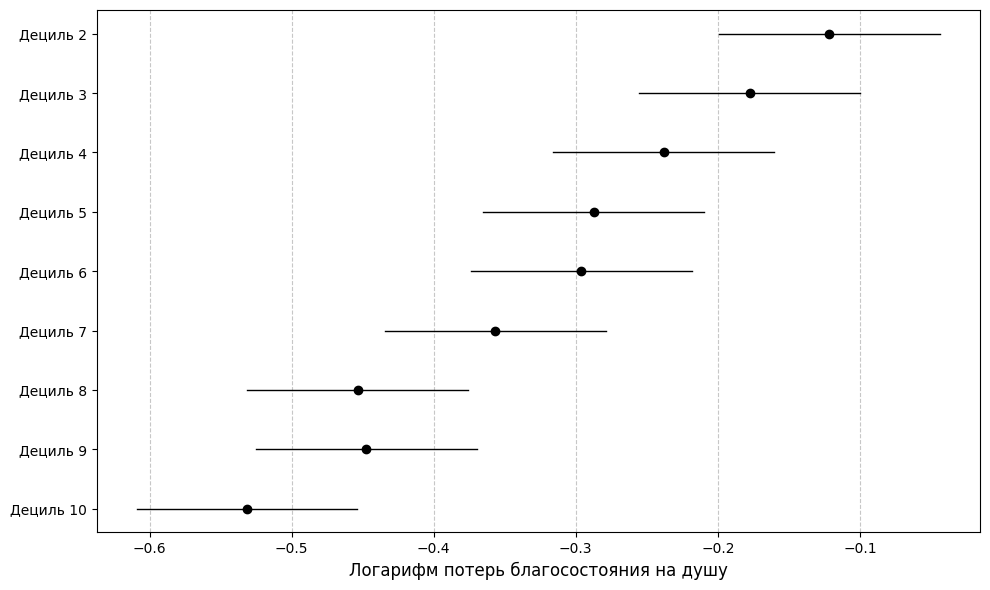

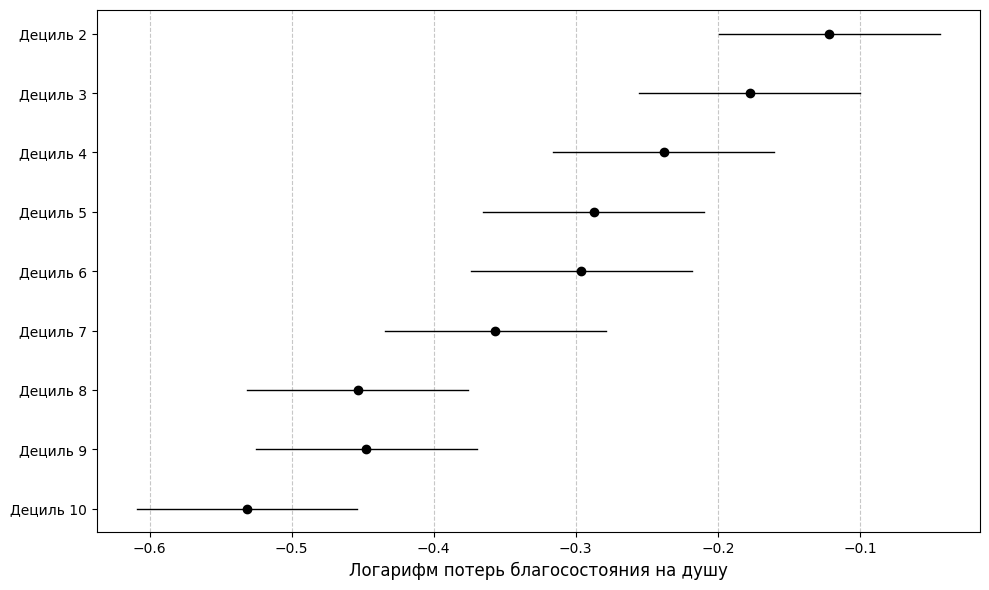

In [101]:
def log_plot(model, coef):
    # Примерные данные для модели (замените на вашу модель)
    deciles = ["Дециль 2", "Дециль 3", "Дециль 4", "Дециль 5", "Дециль 6", "Дециль 7", "Дециль 8", "Дециль 9", "Дециль 10"]

    # Получение коэффициентов и доверительных интервалов из модели
    coefs = model.params.values[1:]
    conf_int = model.conf_int().values[1:, :]

    # Построение графика
    fig, ax = plt.subplots(figsize=(10, 6))

    # Добавление линий доверительных интервалов
    for i in range(len(coefs)):
        ax.plot([-conf_int[i, 0], -conf_int[i, 1]], [i, i], color="black", linestyle="-", linewidth=1)

    # Добавление точек (средних значений)
    ax.scatter(-coefs, range(len(coefs)), color="black", zorder=3)

    # Настройка осей
    ax.set_yticks(range(len(coefs)))
    ax.set_yticklabels(deciles, fontsize=10)
    ax.set_xlabel("Логарифм потерь благосостояния на душу", fontsize=12)
    #ax.set_ylabel("Дециль", fontsize=12)
    ax.invert_yaxis()  # Инвертируем ось Y, чтобы первый дециль был сверху

    # Добавление сетки
    ax.grid(axis="x", linestyle="--", alpha=0.7)

    plt.tight_layout()
    plt.savefig(f"log_decile_{coef}.png", dpi=400)

log_plot(model, 50)
log_plot(model2, 100)
log_plot(model3, 200)

In [102]:
data_m["change_50%_total"] = (data_m["total_expend_50%_shock"] - data_m["total_expend_per_person"])
data_m["change_50%_total_%"] = (data_m["total_expend_50%_shock"] - data_m["total_expend_per_person"]) / data_m["total_expend_per_person"]
data_grouping = data_m[data_m["change_50%_total"] != 0]
data_x = data_grouping.groupby("decile")[["total_expend_per_person", 'total_expend_50%_shock', "change_50%_total", "change_50%_total_%"]].agg([np.median, np.mean]).T
print(data_x.to_markdown())

|                                       |            1 |            2 |            3 |              4 |             5 |              6 |              7 |              8 |              9 |             10 |
|:--------------------------------------|-------------:|-------------:|-------------:|---------------:|--------------:|---------------:|---------------:|---------------:|---------------:|---------------:|
| ('total_expend_per_person', 'median') | 5435.71      | 7783.82      | 9698.97      | 11367.1        | 13168.2       | 15268          | 17764.4        | 20962          | 26560.6        | 43113.2        |
| ('total_expend_per_person', 'mean')   | 5122.29      | 7802.98      | 9670.96      | 11377.5        | 13161.2       | 15292.5        | 17811.3        | 21049.3        | 26917.4        | 58031.5        |
| ('total_expend_50%_shock', 'median')  | 5498.58      | 7894.56      | 9789.46      | 11513.2        | 13285.2       | 15390.6        | 17915.7        | 21089          | 26718.8  

/tmp/ipykernel_18521/617083071.py:4: FutureWarning: The provided callable <function median at 0x7fdac4230ea0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  data_x = data_grouping.groupby("decile")[["total_expend_per_person", 'total_expend_50%_shock', "change_50%_total", "change_50%_total_%"]].agg([np.median, np.mean]).T
/tmp/ipykernel_18521/617083071.py:4: FutureWarning: The provided callable <function mean at 0x7fdac430ade0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  data_x = data_grouping.groupby("decile")[["total_expend_per_person", 'total_expend_50%_shock', "change_50%_total", "change_50%_total_%"]].agg([np.median, np.mean]).T


In [103]:
data_m["change_100%_total"] = (data_m["total_expend_100%_shock"] - data_m["total_expend_per_person"])
data_m["change_100%_total_%"] = (data_m["total_expend_100%_shock"] - data_m["total_expend_per_person"]) / data_m["total_expend_per_person"]
data_grouping = data_m[data_m["change_100%_total"] != 0]
data_x = data_grouping.groupby("decile")[["total_expend_per_person", 'total_expend_100%_shock', "change_100%_total", "change_100%_total_%"]].agg([np.median, np.mean]).T
print(data_x.to_markdown())

|                                       |            1 |            2 |            3 |             4 |             5 |             6 |             7 |             8 |              9 |             10 |
|:--------------------------------------|-------------:|-------------:|-------------:|--------------:|--------------:|--------------:|--------------:|--------------:|---------------:|---------------:|
| ('total_expend_per_person', 'median') | 5435.71      | 7783.82      | 9698.97      | 11367.1       | 13168.2       | 15268         | 17764.4       | 20962         | 26560.6        | 43113.2        |
| ('total_expend_per_person', 'mean')   | 5122.29      | 7802.98      | 9670.96      | 11377.5       | 13161.2       | 15292.5       | 17811.3       | 21049.3       | 26917.4        | 58031.5        |
| ('total_expend_100%_shock', 'median') | 5561.99      | 8005.48      | 9895.43      | 11635.5       | 13398         | 15511.7       | 18065.8       | 21241.8       | 26860.4        | 43514.8     

/tmp/ipykernel_18521/2753929823.py:4: FutureWarning: The provided callable <function median at 0x7fdac4230ea0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  data_x = data_grouping.groupby("decile")[["total_expend_per_person", 'total_expend_100%_shock', "change_100%_total", "change_100%_total_%"]].agg([np.median, np.mean]).T
/tmp/ipykernel_18521/2753929823.py:4: FutureWarning: The provided callable <function mean at 0x7fdac430ade0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  data_x = data_grouping.groupby("decile")[["total_expend_per_person", 'total_expend_100%_shock', "change_100%_total", "change_100%_total_%"]].agg([np.median, np.mean]).T


In [104]:
data_m["change_200%_total"] = (data_m["total_expend_200%_shock"] - data_m["total_expend_per_person"])
data_m["change_200%_total_%"] = (data_m["total_expend_200%_shock"] - data_m["total_expend_per_person"]) / data_m["total_expend_per_person"]
data_grouping = data_m[data_m["change_200%_total"] != 0]
data_x = data_grouping.groupby("decile")[["total_expend_per_person", 'total_expend_200%_shock', "change_200%_total", "change_200%_total_%"]].agg([np.median, np.mean]).T
print(data_x.to_markdown())

|                                       |            1 |            2 |             3 |             4 |             5 |             6 |             7 |             8 |             9 |            10 |
|:--------------------------------------|-------------:|-------------:|--------------:|--------------:|--------------:|--------------:|--------------:|--------------:|--------------:|--------------:|
| ('total_expend_per_person', 'median') | 5435.71      | 7783.82      |  9698.97      | 11367.1       | 13168.2       | 15268         | 17764.4       | 20962         | 26560.6       | 43113.2       |
| ('total_expend_per_person', 'mean')   | 5122.29      | 7802.98      |  9670.96      | 11377.5       | 13161.2       | 15292.5       | 17811.3       | 21049.3       | 26917.4       | 58031.5       |
| ('total_expend_200%_shock', 'median') | 5719.16      | 8192.47      | 10130.5       | 11872.5       | 13640.4       | 15781.7       | 18361.3       | 21577.2       | 27162         | 43761.4       |


/tmp/ipykernel_18521/3751468965.py:4: FutureWarning: The provided callable <function median at 0x7fdac4230ea0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  data_x = data_grouping.groupby("decile")[["total_expend_per_person", 'total_expend_200%_shock', "change_200%_total", "change_200%_total_%"]].agg([np.median, np.mean]).T
/tmp/ipykernel_18521/3751468965.py:4: FutureWarning: The provided callable <function mean at 0x7fdac430ade0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  data_x = data_grouping.groupby("decile")[["total_expend_per_person", 'total_expend_200%_shock', "change_200%_total", "change_200%_total_%"]].agg([np.median, np.mean]).T


## Индекс Джини

In [105]:
price_shocks = [0.5, 1.0, 2.0]

for shock in price_shocks:
    shock_column = f'oil_expend_shock_{int(shock*100)}_neg_%'
    data_m[shock_column] = data_m['ye1_38c_per_person']* (1 + shock)
    after_shock = f'total_expend_{int(shock*100)}%_neg_shock'
    data_m[after_shock] = data_m['total_expend_per_person'] - data_m[shock_column]

In [106]:
data_m.columns

Index(['ye1_38b', 'ye1_38c', 'total_expend', 'status', 'hhtype', 'y_nfm',
       'total_food', 'percentile', 'price_per_liter',
       'total_expend_per_person', 'total_food_per_person',
       'ye1_38c_per_person', 'oil_expend_shock_50%', 'total_expend_50%_shock',
       'oil_expend_shock_100%', 'total_expend_100%_shock',
       'oil_expend_shock_200%', 'total_expend_200%_shock', 'decile',
       'wealfare_change_absolute_50', 'wealfare_change_absolute_100',
       'wealfare_change_absolute_200', 'wealfare_change_perc_50',
       'wealfare_change_perc_100', 'wealfare_change_perc_200',
       'change_50%_total', 'change_50%_total_%', 'change_100%_total',
       'change_100%_total_%', 'change_200%_total', 'change_200%_total_%',
       'oil_expend_shock_50_neg_%', 'total_expend_50%_neg_shock',
       'oil_expend_shock_100_neg_%', 'total_expend_100%_neg_shock',
       'oil_expend_shock_200_neg_%', 'total_expend_200%_neg_shock'],
      dtype='object')

In [107]:
def gini(array):
    array = np.array(array)
    array = array[array >= 0]
    if len(array) == 0:
        return 0

    array = np.sort(array)
    n = len(array)
    cumulative = np.cumsum(array)
    return (2 / n) * np.sum((np.arange(1, n + 1) * array)) / np.sum(array) - (n + 1) / n

In [117]:
expend_before = gini(data_m['total_expend_per_person'])
expend_after_50_gini = gini(data_m[ 'total_expend_50%_neg_shock'])
expend_after_100_gini = gini(data_m[ 'total_expend_100%_neg_shock'])
expend_after_200_gini = gini(data_m[ 'total_expend_200%_neg_shock'])
print(expend_before, expend_after_50_gini, expend_after_100_gini, expend_after_200_gini)

0.3816197493039599 0.3878498850214467 0.39009203361715894 0.39463480480612856


In [118]:
print(f"До шока: {expend_before:.3f}")
print(f"После 50% шока: {expend_after_50_gini:.3f}")
print(f"После 100% шока: {expend_after_100_gini:.3f}")
print(f"После 200% шока: {expend_after_200_gini:.3f}")

До шока: 0.382
После 50% шока: 0.388
После 100% шока: 0.390
После 200% шока: 0.395


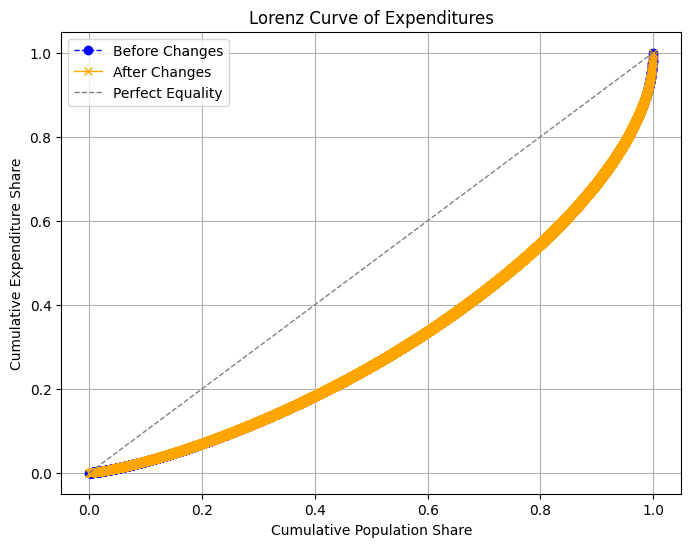

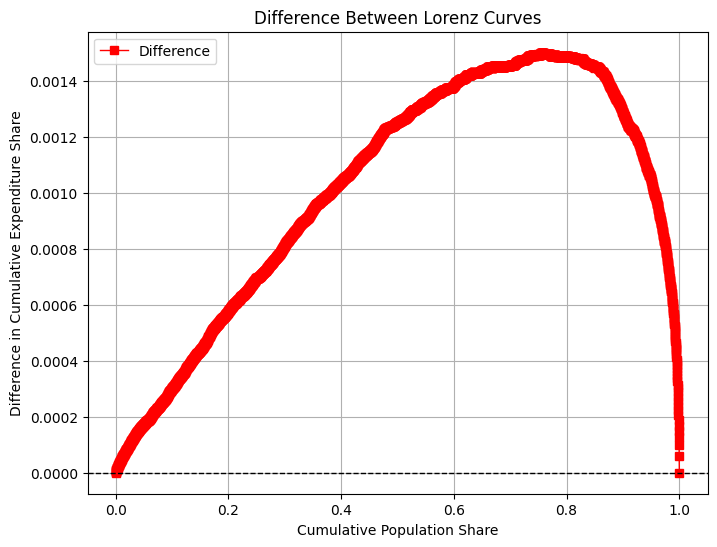

In [110]:

# Example expenditures
expenditures_before = data_m['total_expend_per_person']  # Example data before changes
expenditures_after = data_m['total_expend_50%_shock']   # Example data after changes


import numpy as np
import matplotlib.pyplot as plt

def lorenz_curve(data):
    """
    Compute the Lorenz curve for the given data.
    :param data: Array-like, expenditures or other distribution data.
    :return: Cumulative population share and cumulative expenditure share.
    """
    data_sorted = np.sort(data)
    cumulative_expenditure = np.cumsum(data_sorted) / np.sum(data_sorted)
    cumulative_population = np.arange(1, len(data) + 1) / len(data)
    return cumulative_population, cumulative_expenditure




# Compute Lorenz curves
pop_before, expend_before = lorenz_curve(expenditures_before)
pop_after, expend_after = lorenz_curve(expenditures_after)

# Add (0, 0) for plotting
pop_before = np.insert(pop_before, 0, 0)
expend_before = np.insert(expend_before, 0, 0)
pop_after = np.insert(pop_after, 0, 0)
expend_after = np.insert(expend_after, 0, 0)

# Plot Lorenz curves
plt.figure(figsize=(8, 6))
plt.plot(pop_before, expend_before, label='Before Changes', linestyle='--', color='blue', marker='o', linewidth=1)
plt.plot(pop_after, expend_after, label='After Changes', linestyle='-', color='orange', marker='x', linewidth=1)

# Plot perfect equality line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Perfect Equality', linewidth=1)

plt.title('Lorenz Curve of Expenditures')
plt.xlabel('Cumulative Population Share')
plt.ylabel('Cumulative Expenditure Share')
plt.legend()
plt.grid()
plt.show()

# Calculate and plot the difference between curves
difference = np.array(expend_after) - np.array(expend_before)
plt.figure(figsize=(8, 6))
plt.plot(pop_before, difference, label='Difference', color='red', marker='s', linewidth=1)
plt.title('Difference Between Lorenz Curves')
plt.xlabel('Cumulative Population Share')
plt.ylabel('Difference in Cumulative Expenditure Share')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.legend()
plt.grid()
plt.show()


## Мера неравенства Аткинсона

In [119]:
def atkinson(array, epsilon=1):
    """
    Вычисляет меру неравенства Аткинсона.

    Параметры:
    array (list или np.ndarray): Входной массив значений (например, доходов или расходов).
    epsilon (float): Параметр чувствительности к неравенству (ε). Должен быть >= 0.

    Возвращает:
    float: Мера неравенства Аткинсона. Если массив пустой или сумма равна 0, возвращает 0.
    """
    # Преобразование в numpy массив
    array = np.array(array, dtype=np.float64)
    # Убираем нулевые или отрицательные значения
    array = array[array > 0]
    if len(array) == 0 or np.sum(array) == 0:
        return 0

    # Среднее арифметическое
    mean = np.mean(array)

    # Вычисление меры Аткинсона
    if epsilon == 1:
        # Предельный случай при epsilon = 1
        geometric_mean = np.exp(np.mean(np.log(array)))
        return 1 - (geometric_mean / mean)
    else:
        # Общий случай
        mean_power = np.mean(array ** (1 - epsilon))
        return 1 - (mean_power ** (1 / (1 - epsilon)) / mean)

In [120]:
indic_50 = []
indic_100 = []
indic_200 = []
before = []

before.append(expend_before.round(3))
indic_50.append(expend_after_50_gini.round(3))
indic_100.append(expend_after_100_gini.round(3))
indic_200.append(expend_after_200_gini.round(3))

indicators_name = ["Джинни", "Индекс Аткинсона (e=0.5)", "Индекс Аткинсона (e=1)", "Индекс Аткинсона (e=2)"]

In [121]:
atkinson_result = {}

for eps in [0.5, 1, 2]:
    expend_before = atkinson(data_m['total_expend_per_person'], epsilon = eps)
    expend_after_50_a = atkinson(data_m[ 'total_expend_50%_neg_shock'], epsilon = eps)
    expend_after_100_a = atkinson(data_m[ 'total_expend_100%_neg_shock'], epsilon = eps)
    expend_after_200_a = atkinson(data_m[ 'total_expend_200%_neg_shock'], epsilon = eps)

    before.append(expend_before.round(3))
    indic_50.append(expend_after_50_a.round(3))
    indic_100.append(expend_after_100_a.round(3))
    indic_200.append(expend_after_200_a.round(3))



In [122]:
indicators = {
    "Индикатор" : indicators_name,
    "До шока": before,
    "После 50% шока": indic_50,
    "После 100% шока": indic_100,
    "После 200% шока": indic_200,
}

df_indicators = pd.DataFrame(indicators)
print(df_indicators)

                  Индикатор  До шока  После 50% шока  После 100% шока  \
0                    Джинни    0.382           0.388            0.390   
1  Индекс Аткинсона (e=0.5)    0.127           0.131            0.133   
2    Индекс Аткинсона (e=1)    0.220           0.228            0.231   
3    Индекс Аткинсона (e=2)    0.369           0.389            0.435   

   После 200% шока  
0            0.395  
1            0.136  
2            0.236  
3            0.429  


In [123]:
print(df_indicators.to_markdown(index=False))

| Индикатор                |   До шока |   После 50% шока |   После 100% шока |   После 200% шока |
|:-------------------------|----------:|-----------------:|------------------:|------------------:|
| Джинни                   |     0.382 |            0.388 |             0.39  |             0.395 |
| Индекс Аткинсона (e=0.5) |     0.127 |            0.131 |             0.133 |             0.136 |
| Индекс Аткинсона (e=1)   |     0.22  |            0.228 |             0.231 |             0.236 |
| Индекс Аткинсона (e=2)   |     0.369 |            0.389 |             0.435 |             0.429 |


## Среднее и медиана для разных групп

In [434]:
data_m.columns

Index(['ye1_38b', 'ye1_38c', 'total_expend', 'status', 'hhtype', 'y_nfm',
       'total_food', 'percentile', 'price_per_liter',
       'total_expend_per_person', 'total_food_per_person',
       'ye1_38c_per_person', 'oil_expend_shock_50%', 'total_expend_50%_shock',
       'oil_expend_shock_100%', 'total_expend_100%_shock',
       'oil_expend_shock_200%', 'total_expend_200%_shock', 'decile',
       'wealfare_change_absolute_50', 'wealfare_change_absolute_100',
       'wealfare_change_absolute_200', 'wealfare_change_perc_50',
       'wealfare_change_perc_100', 'wealfare_change_perc_200',
       'change_50%_total', 'change_50%_total_%', 'change_100%_total',
       'change_100%_total_%', 'change_200%_total', 'change_200%_total_%',
       'oil_expend_shock_50_neg_%', 'total_expend_50%_neg_shock',
       'oil_expend_shock_100_neg_%', 'total_expend_100%_neg_shock',
       'oil_expend_shock_200_neg_%', 'total_expend_200%_neg_shock'],
      dtype='object')

In [435]:
df_encoded = pd.get_dummies(data_m, columns=['hhtype'], prefix = 'hhtype')
df_encoded[['hhtype_глава Женщина пенс возраста', 'hhtype_глава Женщина трудоспос возраста', 'hhtype_глава Мужчина пенс возраста', 'hhtype_глава Мужчина трудоспос возраста', 'hhtype_глава несовершеннолетний']] = df_encoded[['hhtype_глава Женщина пенс возраста', 'hhtype_глава Женщина трудоспос возраста', 'hhtype_глава Мужчина пенс возраста', 'hhtype_глава Мужчина трудоспос возраста', 'hhtype_глава несовершеннолетний']].astype(int)

In [436]:
import statsmodels.api as sm
df_encoded["change_50%_total"] = (df_encoded["total_expend_50%_shock"] - df_encoded["total_expend_per_person"])
#df_encoded["change_50%_total_percent"] = (df_encoded["total_expend_50%_shock"] - df_encoded["total_expend_per_person"]) /  df_encoded["total_expend_per_person"]

df_encoded["log_change_50%_total"] = np.log(df_encoded["change_50%_total"])

y = df_encoded["log_change_50%_total"]

X = df_encoded[['hhtype_глава Женщина пенс возраста', 'hhtype_глава Женщина трудоспос возраста', 'hhtype_глава Мужчина пенс возраста']]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

In [437]:
summary = summary_col([model], stars=True, float_format="%.4f")
print(summary)


                                        log_change_50%_total
------------------------------------------------------------
const                                   5.7721***           
                                        (0.0103)            
hhtype_глава Женщина пенс возраста      0.9195***           
                                        (0.0192)            
hhtype_глава Женщина трудоспос возраста 0.2900***           
                                        (0.0236)            
hhtype_глава Мужчина пенс возраста      0.4737***           
                                        (0.0216)            
R-squared                               0.3464              
R-squared Adj.                          0.3460              
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [438]:
import statsmodels.api as sm
df_encoded["change_100%_total"] = (df_encoded["total_expend_100%_shock"] - df_encoded["total_expend_per_person"])
#df_encoded["change_50%_total_percent"] = (df_encoded["total_expend_50%_shock"] - df_encoded["total_expend_per_person"]) /  df_encoded["total_expend_per_person"]

df_encoded["log_change_100%_total"] = np.log(df_encoded["change_100%_total"])

y = df_encoded["log_change_100%_total"]

X = df_encoded[['hhtype_глава Женщина пенс возраста', 'hhtype_глава Женщина трудоспос возраста', 'hhtype_глава Мужчина пенс возраста']]
X = sm.add_constant(X)

model2 = sm.OLS(y, X).fit()
summary = summary_col([model2], stars=True, float_format="%.4f")
print(summary)


                                        log_change_100%_total
-------------------------------------------------------------
const                                   6.4652***            
                                        (0.0103)             
hhtype_глава Женщина пенс возраста      0.9195***            
                                        (0.0192)             
hhtype_глава Женщина трудоспос возраста 0.2900***            
                                        (0.0236)             
hhtype_глава Мужчина пенс возраста      0.4737***            
                                        (0.0216)             
R-squared                               0.3464               
R-squared Adj.                          0.3460               
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [439]:
import statsmodels.api as sm
df_encoded["change_200%_total"] = (df_encoded["total_expend_200%_shock"] - df_encoded["total_expend_per_person"])
#df_encoded["change_50%_total_percent"] = (df_encoded["total_expend_50%_shock"] - df_encoded["total_expend_per_person"]) /  df_encoded["total_expend_per_person"]

df_encoded["log_change_200%_total"] = np.log(df_encoded["change_200%_total"])

y = df_encoded["log_change_200%_total"]

X = df_encoded[['hhtype_глава Женщина пенс возраста', 'hhtype_глава Женщина трудоспос возраста', 'hhtype_глава Мужчина пенс возраста']]
X = sm.add_constant(X)

model3 = sm.OLS(y, X).fit()
summary = summary_col([model3], stars=True, float_format="%.4f")
print(summary)


                                        log_change_200%_total
-------------------------------------------------------------
const                                   7.1584***            
                                        (0.0103)             
hhtype_глава Женщина пенс возраста      0.9195***            
                                        (0.0192)             
hhtype_глава Женщина трудоспос возраста 0.2900***            
                                        (0.0236)             
hhtype_глава Мужчина пенс возраста      0.4737***            
                                        (0.0216)             
R-squared                               0.3464               
R-squared Adj.                          0.3460               
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


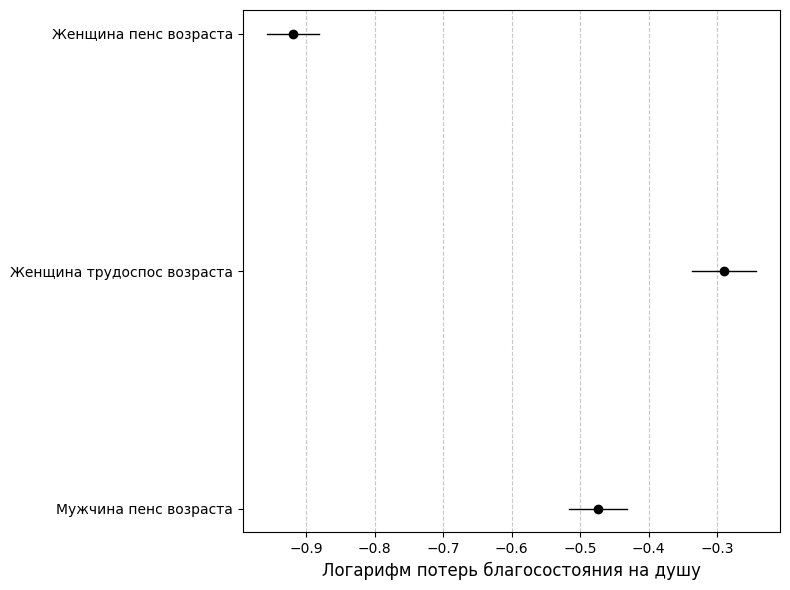

In [440]:
# Примерные данные для модели (замените на вашу модель)
deciles = ['Женщина пенс возраста', 'Женщина трудоспос возраста', 'Мужчина пенс возраста']

# Получение коэффициентов и доверительных интервалов из модели
coefs = model.params.values[1:]
conf_int = model.conf_int().values[1:, :]

# Построение графика
fig, ax = plt.subplots(figsize=(8, 6))

# Добавление линий доверительных интервалов
for i in range(len(coefs)):
    ax.plot([-conf_int[i, 0], -conf_int[i, 1]], [i, i], color="black", linestyle="-", linewidth=1)

# Добавление точек (средних значений)
ax.scatter(-coefs, range(len(coefs)), color="black", zorder=3)

# Настройка осей
ax.set_yticks(range(len(coefs)))
ax.set_yticklabels(deciles, fontsize=10)
ax.set_xlabel("Логарифм потерь благосостояния на душу", fontsize=12)
#ax.set_ylabel("Дециль", fontsize=12)
ax.invert_yaxis()  # Инвертируем ось Y, чтобы первый дециль был сверху

# Добавление сетки
ax.grid(axis="x", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

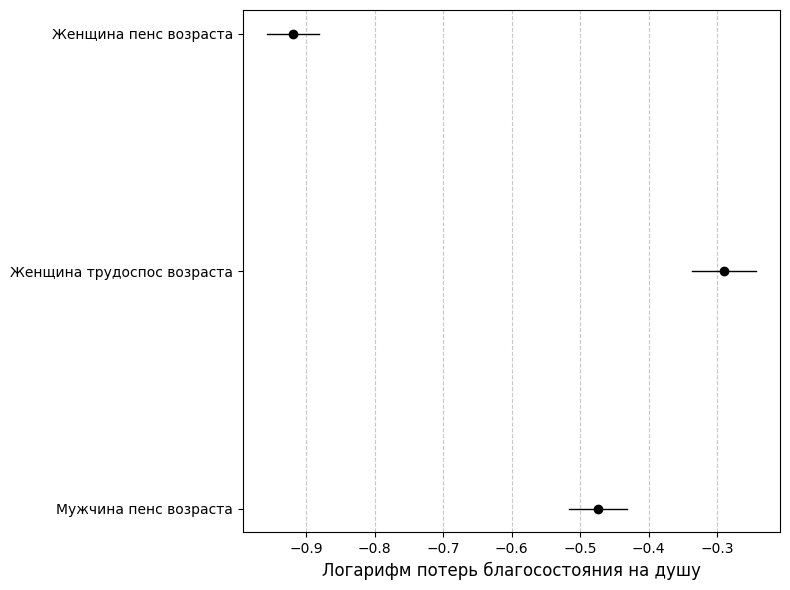

In [441]:
# Примерные данные для модели (замените на вашу модель)
deciles = ['Женщина пенс возраста', 'Женщина трудоспос возраста', 'Мужчина пенс возраста']

# Получение коэффициентов и доверительных интервалов из модели
coefs = model2.params.values[1:]
conf_int = model2.conf_int().values[1:, :]

# Построение графика
fig, ax = plt.subplots(figsize=(8, 6))

# Добавление линий доверительных интервалов
for i in range(len(coefs)):
    ax.plot([-conf_int[i, 0], -conf_int[i, 1]], [i, i], color="black", linestyle="-", linewidth=1)

# Добавление точек (средних значений)
ax.scatter(-coefs, range(len(coefs)), color="black", zorder=3)

# Настройка осей
ax.set_yticks(range(len(coefs)))
ax.set_yticklabels(deciles, fontsize=10)
ax.set_xlabel("Логарифм потерь благосостояния на душу", fontsize=12)
#ax.set_ylabel("Дециль", fontsize=12)
ax.invert_yaxis()  # Инвертируем ось Y, чтобы первый дециль был сверху

# Добавление сетки
ax.grid(axis="x", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

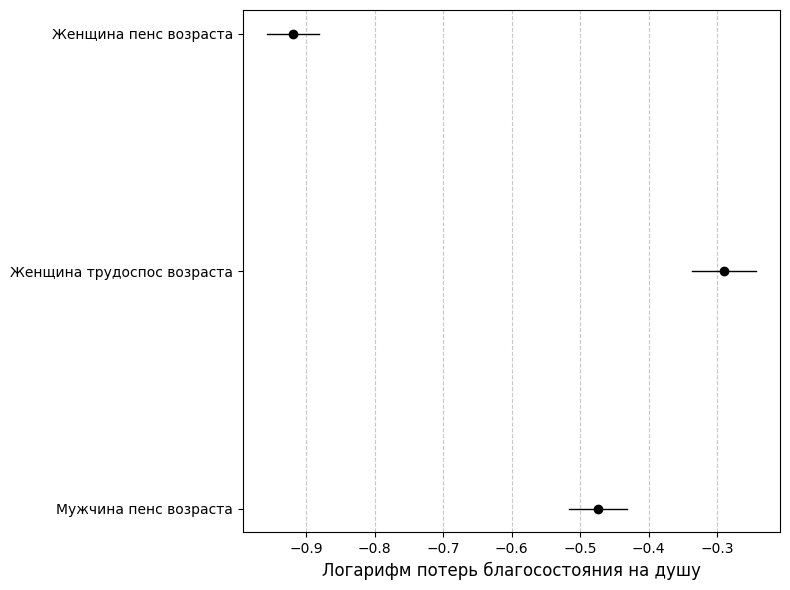

In [442]:
# Примерные данные для модели (замените на вашу модель)
deciles = ['Женщина пенс возраста', 'Женщина трудоспос возраста', 'Мужчина пенс возраста']

# Получение коэффициентов и доверительных интервалов из модели
coefs = model3.params.values[1:]
conf_int = model3.conf_int().values[1:, :]

# Построение графика
fig, ax = plt.subplots(figsize=(8, 6))

# Добавление линий доверительных интервалов
for i in range(len(coefs)):
    ax.plot([-conf_int[i, 0], -conf_int[i, 1]], [i, i], color="black", linestyle="-", linewidth=1)

# Добавление точек (средних значений)
ax.scatter(-coefs, range(len(coefs)), color="black", zorder=3)

# Настройка осей
ax.set_yticks(range(len(coefs)))
ax.set_yticklabels(deciles, fontsize=10)
ax.set_xlabel("Логарифм потерь благосостояния на душу", fontsize=12)
#ax.set_ylabel("Дециль", fontsize=12)
ax.invert_yaxis()  # Инвертируем ось Y, чтобы первый дециль был сверху

# Добавление сетки
ax.grid(axis="x", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

In [443]:
data_m["change_50%_total"] = (data_m["total_expend_50%_shock"] - data_m["total_expend_per_person"])
data_m["change_50%_total_%"] = (data_m["total_expend_50%_shock"] - data_m["total_expend_per_person"]) / data_m["total_expend_per_person"]
data_grouping = data_m[data_m["change_50%_total"] != 0]
data_grouping = data_grouping[data_grouping['hhtype'] != 'глава несовершеннолетний']
data_x = data_grouping.groupby("hhtype")[["total_expend_per_person", 'total_expend_50%_shock', "change_50%_total", "change_50%_total_%"]].agg([np.median, np.mean]).T
print(data_x.to_markdown())

|                                       |   глава Женщина пенс возраста |   глава Женщина трудоспос возраста |   глава Мужчина пенс возраста |   глава Мужчина трудоспос возраста |
|:--------------------------------------|------------------------------:|-----------------------------------:|------------------------------:|-----------------------------------:|
| ('total_expend_per_person', 'median') |                 16194.2       |                      14959.2       |                 13818.6       |                      13287.8       |
| ('total_expend_per_person', 'mean')   |                 19374.6       |                      20743.6       |                 16797.6       |                      18373.4       |
| ('total_expend_50%_shock', 'median')  |                 17106.5       |                      15449.9       |                 14370.1       |                      13719.6       |
| ('total_expend_50%_shock', 'mean')    |                 20226.2       |                      21256

In [444]:
data_m["change_100%_total"] = (data_m["total_expend_100%_shock"] - data_m["total_expend_per_person"])
data_m["change_100%_total_%"] = (data_m["total_expend_100%_shock"] - data_m["total_expend_per_person"]) / data_m["total_expend_per_person"]
data_grouping = data_m[data_m["change_100%_total"] != 0]
data_grouping = data_grouping[data_grouping['hhtype'] != 'глава несовершеннолетний']
data_x = data_grouping.groupby("hhtype")[["total_expend_per_person", 'total_expend_100%_shock', "change_100%_total", "change_100%_total_%"]].agg([np.median, np.mean]).T
print(data_x.to_markdown())

|                                       |   глава Женщина пенс возраста |   глава Женщина трудоспос возраста |   глава Мужчина пенс возраста |   глава Мужчина трудоспос возраста |
|:--------------------------------------|------------------------------:|-----------------------------------:|------------------------------:|-----------------------------------:|
| ('total_expend_per_person', 'median') |                  16194.2      |                      14959.2       |                 13818.6       |                      13287.8       |
| ('total_expend_per_person', 'mean')   |                  19374.6      |                      20743.6       |                 16797.6       |                      18373.4       |
| ('total_expend_100%_shock', 'median') |                  17976.8      |                      15827.9       |                 14950.6       |                      14072.2       |
| ('total_expend_100%_shock', 'mean')   |                  21077.8      |                      21769

In [445]:
data_m["change_200%_total"] = (data_m["total_expend_200%_shock"] - data_m["total_expend_per_person"])
data_m["change_200%_total_%"] = (data_m["total_expend_200%_shock"] - data_m["total_expend_per_person"]) / data_m["total_expend_per_person"]
data_grouping = data_m[data_m["change_200%_total"] != 0]
data_grouping = data_grouping[data_grouping['hhtype'] != 'глава несовершеннолетний']
data_x = data_grouping.groupby("hhtype")[["total_expend_per_person", 'total_expend_200%_shock', "change_200%_total", "change_200%_total_%"]].agg([np.median, np.mean]).T
print(data_x.to_markdown())

|                                       |   глава Женщина пенс возраста |   глава Женщина трудоспос возраста |   глава Мужчина пенс возраста |   глава Мужчина трудоспос возраста |
|:--------------------------------------|------------------------------:|-----------------------------------:|------------------------------:|-----------------------------------:|
| ('total_expend_per_person', 'median') |                  16194.2      |                        14959.2     |                  13818.6      |                      13287.8       |
| ('total_expend_per_person', 'mean')   |                  19374.6      |                        20743.6     |                  16797.6      |                      18373.4       |
| ('total_expend_200%_shock', 'median') |                  19687.4      |                        16640.9     |                  15958.2      |                      14731.6       |
| ('total_expend_200%_shock', 'mean')   |                  22781        |                        227

In [446]:
df_encoded = pd.get_dummies(data_m, columns=['status'])
df_encoded[['status_1.0', 'status_3.0', 'status_4.0']] = df_encoded[['status_1.0', 'status_3.0', 'status_4.0']].astype(int)

In [447]:
df_encoded

,ye1_38b,ye1_38c,total_expend,hhtype,y_nfm,total_food,percentile,price_per_liter,total_expend_per_person,total_food_per_person,...,change_200%_total_%,oil_expend_shock_50_neg_%,total_expend_50%_neg_shock,oil_expend_shock_100_neg_%,total_expend_100%_neg_shock,oil_expend_shock_200_neg_%,total_expend_200%_neg_shock,status_1.0,status_3.0,status_4.0
0,1.160,452.3573,31943.421875,глава Женщина пенс возраста,1.0,9099.440430,90,389.963190,31943.421875,9099.440430,...,0.113290,2714.1438,29229.278075,3618.858400,28324.563475,5428.2876,26515.134275,0,1,0
1,1.031,365.8707,25445.679688,глава Женщина пенс возраста,1.0,6879.679688,83,354.869738,25445.679688,6879.679688,...,0.115028,2195.2242,23250.455487,2926.965600,22518.714088,4390.4484,21055.231287,0,1,0
2,1.000,334.2900,10472.860352,глава Женщина пенс возраста,1.0,3852.860107,30,334.290000,10472.860352,3852.860107,...,0.255357,2005.7400,8467.120352,2674.320000,7798.540352,4011.4800,6461.380352,0,1,0
3,1.167,469.8428,56543.460938,глава Мужчина трудоспос возраста,4.0,26568.109375,49,402.607369,14135.865234,6642.027344,...,0.066475,704.7642,13431.101034,939.685600,13196.179634,1409.5284,12726.336834,0,1,0
4,1.001,408.3949,53498.511719,глава Мужчина трудоспос возраста,3.0,20237.902344,65,407.986913,17832.837240,6745.967448,...,0.061070,816.7898,17016.047440,1089.053067,16743.784173,1633.5796,16199.257640,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4537,1.000,385.7100,85950.710938,глава Мужчина трудоспос возраста,5.0,20987.541016,62,385.710000,17190.142188,4197.508203,...,0.035901,462.8520,16727.290188,617.136000,16573.006188,925.7040,16264.438188,0,1,0
4538,1.000,385.7100,179725.062500,глава Мужчина трудоспос возраста,5.0,15222.500977,92,385.710000,35945.012500,3044.500195,...,0.017169,462.8520,35482.160500,617.136000,35327.876500,925.7040,35019.308500,0,1,0
4539,1.017,416.2280,18568.560547,глава Мужчина трудоспос возраста,2.0,8318.560547,22,409.270403,9284.280273,4159.280273,...,0.179326,1248.6840,8035.596273,1664.912000,7619.368273,2497.3680,6786.912273,0,1,0
4540,1.157,394.9144,10376.660156,глава Женщина пенс возраста,1.0,5974.290039,29,341.326188,10376.660156,5974.290039,...,0.304464,2369.4864,8007.173756,3159.315200,7217.344956,4738.9728,5637.687356,1,0,0


людей из города у нас нет походу

In [448]:
import statsmodels.api as sm
df_encoded["change_50%_total"] = (df_encoded["total_expend_50%_shock"] - df_encoded["total_expend_per_person"])
#df_encoded["change_50%_total_percent"] = (df_encoded["total_expend_50%_shock"] - df_encoded["total_expend_per_person"]) /  df_encoded["total_expend_per_person"]

df_encoded["log_change_50%_total"] = np.log(df_encoded["change_50%_total"])

y = df_encoded["log_change_50%_total"]

X = df_encoded[['status_3.0', 'status_4.0']] # status_1.0 - базовая категория (областной центр)
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
summary = summary_col([model], stars=True, float_format="%.4f")
print(summary)


               log_change_50%_total
-----------------------------------
const          6.0284***           
               (0.0109)            
status_3.0     -0.0958***          
               (0.0361)            
status_4.0     0.2069***           
               (0.0213)            
R-squared      0.0241              
R-squared Adj. 0.0236              
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [449]:
import statsmodels.api as sm
df_encoded["change_100%_total"] = (df_encoded["total_expend_100%_shock"] - df_encoded["total_expend_per_person"])
#df_encoded["change_50%_total_percent"] = (df_encoded["total_expend_50%_shock"] - df_encoded["total_expend_per_person"]) /  df_encoded["total_expend_per_person"]

df_encoded["log_change_100%_total"] = np.log(df_encoded["change_100%_total"])

y = df_encoded["log_change_100%_total"]

X = df_encoded[['status_3.0', 'status_4.0']] # status_1.0 - базовая категория (областной центр)
X = sm.add_constant(X)

model2 = sm.OLS(y, X).fit()
summary = summary_col([model2], stars=True, float_format="%.4f")
print(summary)


               log_change_100%_total
------------------------------------
const          6.7216***            
               (0.0109)             
status_3.0     -0.0958***           
               (0.0361)             
status_4.0     0.2069***            
               (0.0213)             
R-squared      0.0241               
R-squared Adj. 0.0236               
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [450]:
import statsmodels.api as sm
df_encoded["change_200%_total"] = (df_encoded["total_expend_200%_shock"] - df_encoded["total_expend_per_person"])
#df_encoded["change_50%_total_percent"] = (df_encoded["total_expend_50%_shock"] - df_encoded["total_expend_per_person"]) /  df_encoded["total_expend_per_person"]

df_encoded["log_change_200%_total"] = np.log(df_encoded["change_200%_total"])

y = df_encoded["log_change_200%_total"]

X = df_encoded[['status_3.0', 'status_4.0']] # status_1.0 - базовая категория (областной центр)
X = sm.add_constant(X)

model3 = sm.OLS(y, X).fit()
summary = summary_col([model3], stars=True, float_format="%.4f")
print(summary)


               log_change_200%_total
------------------------------------
const          7.4147***            
               (0.0109)             
status_3.0     -0.0958***           
               (0.0361)             
status_4.0     0.2069***            
               (0.0213)             
R-squared      0.0241               
R-squared Adj. 0.0236               
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


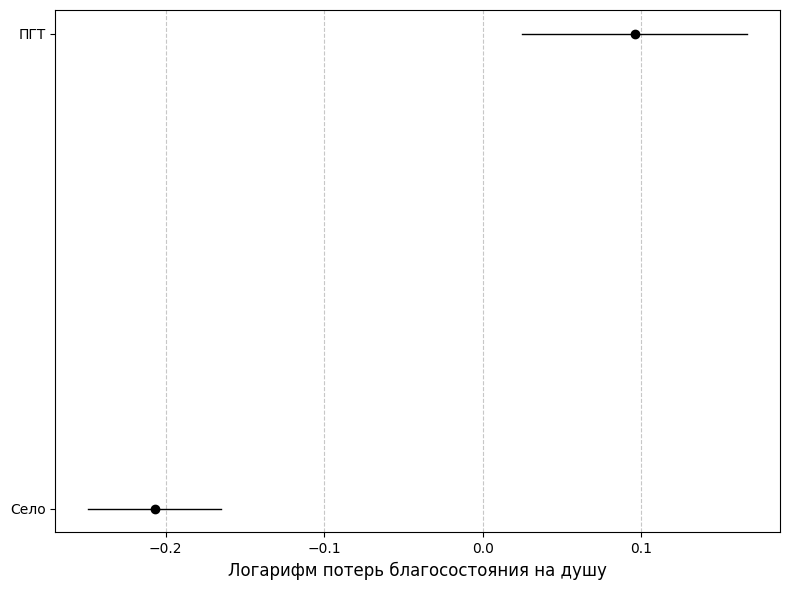

In [451]:
# Примерные данные для модели (замените на вашу модель)
deciles = ['ПГТ', 'Село']

# Получение коэффициентов и доверительных интервалов из модели
coefs = model.params.values[1:]
conf_int = model.conf_int().values[1:, :]

# Построение графика
fig, ax = plt.subplots(figsize=(8, 6))

# Добавление линий доверительных интервалов
for i in range(len(coefs)):
    ax.plot([-conf_int[i, 0], -conf_int[i, 1]], [i, i], color="black", linestyle="-", linewidth=1)

# Добавление точек (средних значений)
ax.scatter(-coefs, range(len(coefs)), color="black", zorder=3)

# Настройка осей
ax.set_yticks(range(len(coefs)))
ax.set_yticklabels(deciles, fontsize=10)
ax.set_xlabel("Логарифм потерь благосостояния на душу", fontsize=12)
#ax.set_ylabel("Дециль", fontsize=12)
ax.invert_yaxis()  # Инвертируем ось Y, чтобы первый дециль был сверху

# Добавление сетки
ax.grid(axis="x", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

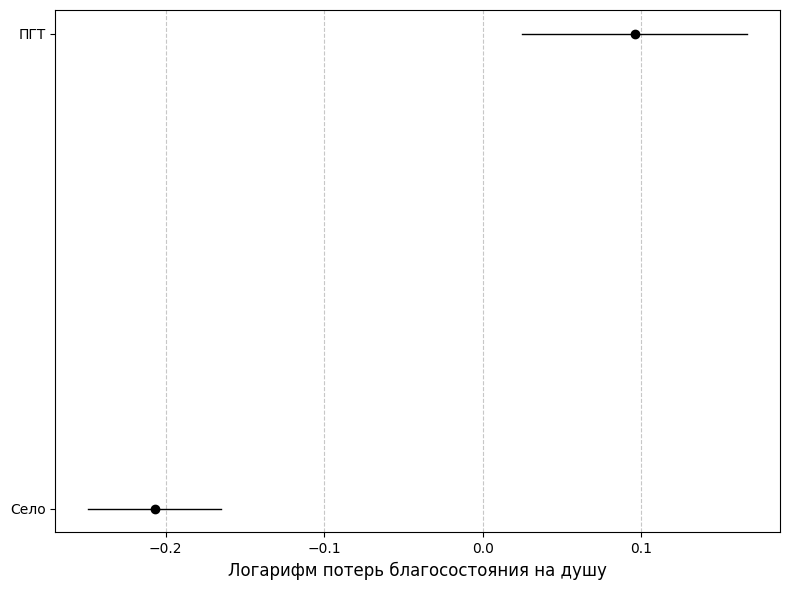

In [452]:
# Примерные данные для модели (замените на вашу модель)
deciles = ['ПГТ', 'Село']

# Получение коэффициентов и доверительных интервалов из модели
coefs = model2.params.values[1:]
conf_int = model2.conf_int().values[1:, :]

# Построение графика
fig, ax = plt.subplots(figsize=(8, 6))

# Добавление линий доверительных интервалов
for i in range(len(coefs)):
    ax.plot([-conf_int[i, 0], -conf_int[i, 1]], [i, i], color="black", linestyle="-", linewidth=1)

# Добавление точек (средних значений)
ax.scatter(-coefs, range(len(coefs)), color="black", zorder=3)

# Настройка осей
ax.set_yticks(range(len(coefs)))
ax.set_yticklabels(deciles, fontsize=10)
ax.set_xlabel("Логарифм потерь благосостояния на душу", fontsize=12)
#ax.set_ylabel("Дециль", fontsize=12)
ax.invert_yaxis()  # Инвертируем ось Y, чтобы первый дециль был сверху

# Добавление сетки
ax.grid(axis="x", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

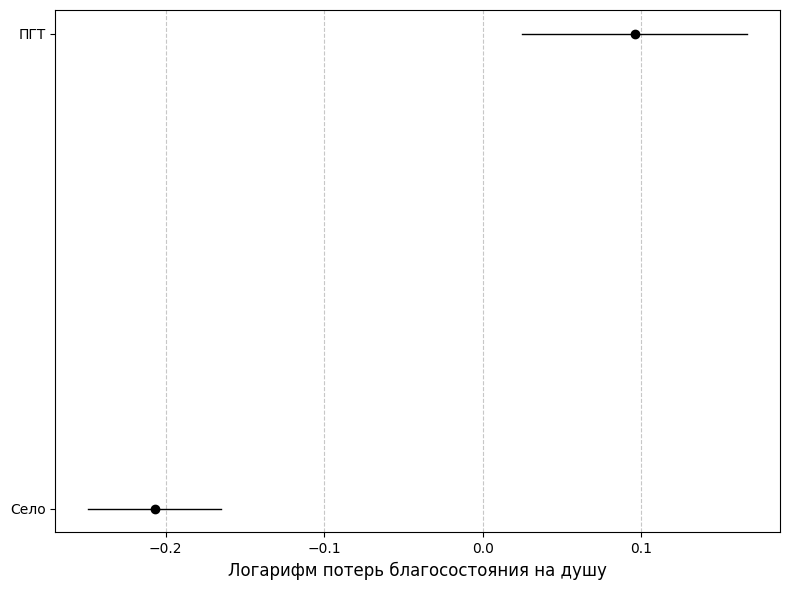

In [453]:
# Примерные данные для модели (замените на вашу модель)
deciles = ['ПГТ', 'Село']

# Получение коэффициентов и доверительных интервалов из модели
coefs = model3.params.values[1:]
conf_int = model3.conf_int().values[1:, :]

# Построение графика
fig, ax = plt.subplots(figsize=(8, 6))

# Добавление линий доверительных интервалов
for i in range(len(coefs)):
    ax.plot([-conf_int[i, 0], -conf_int[i, 1]], [i, i], color="black", linestyle="-", linewidth=1)

# Добавление точек (средних значений)
ax.scatter(-coefs, range(len(coefs)), color="black", zorder=3)

# Настройка осей
ax.set_yticks(range(len(coefs)))
ax.set_yticklabels(deciles, fontsize=10)
ax.set_xlabel("Логарифм потерь благосостояния на душу", fontsize=12)
#ax.set_ylabel("Дециль", fontsize=12)
ax.invert_yaxis()  # Инвертируем ось Y, чтобы первый дециль был сверху

# Добавление сетки
ax.grid(axis="x", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

In [454]:
data_m["change_50%_total"] = (data_m["total_expend_50%_shock"] - data_m["total_expend_per_person"])
data_m["change_50%_total_%"] = (data_m["total_expend_50%_shock"] - data_m["total_expend_per_person"]) / data_m["total_expend_per_person"]
data_grouping = data_m[data_m["change_50%_total"] != 0]
data_x = data_grouping.groupby("status")[["total_expend_per_person", 'total_expend_50%_shock', "change_50%_total", "change_50%_total_%"]].agg([np.median, np.mean]).T
print(data_x.to_markdown())

|                                       |           1.0 |          3.0 |           4.0 |
|:--------------------------------------|--------------:|-------------:|--------------:|
| ('total_expend_per_person', 'median') | 15015.7       | 13074.6      | 11955.1       |
| ('total_expend_per_person', 'mean')   | 19924.3       | 16930.3      | 15461.8       |
| ('total_expend_50%_shock', 'median')  | 15521.3       | 13617.9      | 12640.3       |
| ('total_expend_50%_shock', 'mean')    | 20424.5       | 17381.8      | 16083         |
| ('change_50%_total', 'median')        |   395.529     |   360        |   513.224     |
| ('change_50%_total', 'mean')          |   500.157     |   451.544    |   621.11      |
| ('change_50%_total_%', 'median')      |     0.0264592 |     0.028757 |     0.0437836 |
| ('change_50%_total_%', 'mean')        |     0.034713  |     0.039853 |     0.0576072 |


In [455]:
data_m["change_100%_total"] = (data_m["total_expend_100%_shock"] - data_m["total_expend_per_person"])
data_m["change_100%_total_%"] = (data_m["total_expend_100%_shock"] - data_m["total_expend_per_person"]) / data_m["total_expend_per_person"]
data_grouping = data_m[data_m["change_100%_total"] != 0]
data_x = data_grouping.groupby("status")[["total_expend_per_person", 'total_expend_100%_shock', "change_100%_total", "change_100%_total_%"]].agg([np.median, np.mean]).T
print(data_x.to_markdown())

|                                       |           1.0 |          3.0 |           4.0 |
|:--------------------------------------|--------------:|-------------:|--------------:|
| ('total_expend_per_person', 'median') | 15015.7       | 13074.6      | 11955.1       |
| ('total_expend_per_person', 'mean')   | 19924.3       | 16930.3      | 15461.8       |
| ('total_expend_100%_shock', 'median') | 16021.9       | 14000        | 13266.9       |
| ('total_expend_100%_shock', 'mean')   | 20924.6       | 17833.4      | 16704.1       |
| ('change_100%_total', 'median')       |   791.058     |   720        |  1026.45      |
| ('change_100%_total', 'mean')         |  1000.31      |   903.087    |  1242.22      |
| ('change_100%_total_%', 'median')     |     0.0529184 |     0.057514 |     0.0875672 |
| ('change_100%_total_%', 'mean')       |     0.0694261 |     0.079706 |     0.115214  |


In [456]:
data_m["change_200%_total"] = (data_m["total_expend_200%_shock"] - data_m["total_expend_per_person"])
data_m["change_200%_total_%"] = (data_m["total_expend_200%_shock"] - data_m["total_expend_per_person"]) / data_m["total_expend_per_person"]
data_grouping = data_m[data_m["change_200%_total"] != 0]
data_x = data_grouping.groupby("status")[["total_expend_per_person", 'total_expend_200%_shock', "change_200%_total", "change_200%_total_%"]].agg([np.median, np.mean]).T
print(data_x.to_markdown())

|                                       |          1.0 |          3.0 |          4.0 |
|:--------------------------------------|-------------:|-------------:|-------------:|
| ('total_expend_per_person', 'median') | 15015.7      | 13074.6      | 11955.1      |
| ('total_expend_per_person', 'mean')   | 19924.3      | 16930.3      | 15461.8      |
| ('total_expend_200%_shock', 'median') | 17023        | 15114.4      | 14476        |
| ('total_expend_200%_shock', 'mean')   | 21924.9      | 18736.5      | 17946.3      |
| ('change_200%_total', 'median')       |  1582.12     |  1440        |  2052.9      |
| ('change_200%_total', 'mean')         |  2000.63     |  1806.17     |  2484.44     |
| ('change_200%_total_%', 'median')     |     0.105837 |     0.115028 |     0.175134 |
| ('change_200%_total_%', 'mean')       |     0.138852 |     0.159412 |     0.230429 |
